<a id="bonus"></a>
# 0+. Bonus: Predicción de Ventas en Falabella
---

El problema de esta sección es muy similar al problema 4 de la tarea anterior y les permitirá corregir o entrenarse mejor en aquello que no hayan aprendido bien antes. Esta vez trabajaremos con series de datos reales correspondientes a las ventas de una conocida empresa nacional de retail (Falabella). Los datos fueron recolectados, pre-procesados y anonimizados por una tesista de esta universidad, a través del siguiente __[link](https://www.dropbox.com/sh/14or2wjdb3hp45l/AAAFx325iQ1OlLHacFB3sCh4a?dl=0)__.

<img src="https://www.modaes.com/files//000_2016/falabella/falabella-entrada-exterior-parque-arauco-728.jpg" width="50%" />



Grosso modo, la tarea consiste en anticipar las ventas de los diferentes productos de la compañía con al menos 1 mes de anticipación, es decir predecir hacia "adelante" desde al menos 1 mes. Para simplificar, nos concentraremos en solo **una** de las múltiples tiendas existentes y trataremos de predecir 4 productos de los 400.000 que maneja la empresa. Sin embargo, dispondremos de las series de ventas de todos los 400.000 productos para usar como predictores. Los datos disponibles cubren un horizonte de dos años y tienen frecuencia diaria, es decir, las series tiene un largo total de aproximadamente 2*350 = 700 valores. 

El formato del archivo de datos viene descrito en el archivo *README*. Cada fila corresponde a un día. En cada fila/día se representan las ventas de cada producto. Los productos no vendidos (venta=0) no aparecen.

Como metadata adicional (a usar de modo completamente libre y voluntario), se tiene: un árbol que indica las categorías a las que pertenecen los 400.000 productos (por ejemplo: “zapatos-mujer”), las categorías a las que pertenecen estas categorías (por ejemplo “zapatos”), las categorías a las que pertenecen estas categorías (por ejemplo “moda”) y así sucesivamente. También se tiene un diccionario, que relaciona los ID de producto con marca y otras características. 

Esta actividad es completamente libre, sin código de ayuda, que sin embargo puede reciclar de la tarea anterior. 

> Si decide realizar la actividad 0+ (Bonus), el puntaje obtenido reemplazará la nota de su peor sección de la Tarea 1. Además de que también será válida como sección de ésta tarea, por lo que sólo debe realizar 3 de las siguientes 4 secciones.

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


## Dataset a utilizar

Si bien se entrega un dataset para utilizar, este podría no ser el más adecuado para resolver el problema, ya que, cada día tiene una cantidad variable de columnas, que representa el item en la tienda de la forma (id, ventas, precio_medio). Por ende, crearemos un dataset donde las columnas son items que se venden frecuentemente en la tienda, y las columnas son los días del año, con esto, si elegimos 1.000 items, tendremos cerca de 715x1.000.

Luego, cada celda representará cuantas unidades de ese item se vendieron aquel día, y ya que elegimos items vendidos frecuentemente, no tendremos una matriz dispersa.

Se busca hacer el set de esta forma, ya que le podremos entregar a la red la secuencia que representa la cantidad de items vendidos a lo largo de un período de tiempo, y también la secuencia de 30 días (1 mes) que debería entregar la red.

Dado que tenemos una gran cantidad de items, podremos predecir el stock de los 4 items en cuestión utilizando las secuencias de los demás items. La idea es utilizar una red neuronal recurrente para poder realizar la predicción, ya que, la red aprenderá a partir de una secuencia.

### Leyendo el dataset

Primero, leemos el .csv que se nos entrega, forzándolo a tener la máxima cantidad de columnas que hay en el csv, y rellenamos los NaN.

In [0]:
import pandas as pd

columns = range(16049)
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/costanera.csv', error_bad_lines=False, names = columns, sep = ';', na_values=0)
df.fillna(0, inplace= True)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8542,8543,8544,8545,8546,8547,8548,8549,8550,8551,8552,8553,8554,8555,8556,8557,8558,8559,8560,8561,8562,8563,8564,8565,8566,8567,8568,8569,8570,8571,8572,8573,8574,8575,8576,8577,8578,8579,8580,8581,8582,8583,8584,8585,8586,8587,8588,8589,8590,8591,8592,8593,8594,8595,8596,8597,8598,8599,8600,8601,8602,8603,8604,8605,8606,8607,8608,8609,8610,8611,8612,8613,8614,8615,8616,8617,8618,8619,8620,8621,8622,8623,8624,8625,8626,8627,8628,8629,8630,8631,8632,8633,8634,8635,8636,8637,8638,8639,8640,8641,8642,8643,8644,8645,8646,8647,8648,8649,8650,8651,8652,8653,8654,8655,8656,8657,8658,8659,8660,8661,8662,8663,8664,8665,8666,8667,8668,8669,8670,8671,8672,8673,8674,8675,8676,8677,8678,8679,8680,8681,8682,8683,8684,8685,8686,8687,8688,8689,8690,8691,8692,8693,8694,8695,8696,8697,8698,8699,8700,8701,8702,8703,8704,8705,8706,8707,8708,8709,8710,8711,8712,8713,8714,8715,8716,8717,8718,8719,8720,8721

Dado que se tiene una tupla de la forma '(id_prod, cant_vendida, _precio_medio)', se puede utilizar Literal_eval para evaluar literalmente esta expresión, así obtendremos una tupla, para poder extraer la ID del producto, y la cantidad vendida de este producto.

In [0]:
from ast import literal_eval  #Evalúa una expresión como una expresión de python

filas = df.shape[0]
columnas = df.shape[1]

literal_eval(df.iat[0,0])[0] #Convierte el string en una tupla (id_prod, cant_vendida, precio_promedio)

'4874880'

Luego, podemos obtener la cantidad de días que se vende cada producto al año, así obtenemos un porcentaje de estas pra poder trabajar con un dataset significativo.

In [0]:
import numpy as np

column_names = {}

for fila in range(filas):
  for columna in range(columnas):
    dato = df.iat[fila,columna]
    if dato != 0:
      prod = literal_eval(dato)
      if prod[0] in column_names.keys():
        column_names[prod[0]] += 1
      else:
        column_names[prod[0]] = 1

In [0]:
import heapq
from operator import itemgetter

maxitems = 10

print(len(column_names))
top_columns = dict( heapq.nlargest(maxitems, column_names.items(), key=itemgetter(1) ))
top_columns

575890


{'1356906': 672,
 '165863': 670,
 '168755': 662,
 '168757': 714,
 '2526873': 640,
 '2678016': 698,
 '4229492': 613,
 '4385959': 714,
 '4695904': 673,
 '4741670': 662}

Luego, creamos nuestro dataset de items que se venden frecuentemente, lo poblamos con el valor de venta de cada día de los 2 años, asegurándonos de rellenar las celdas vacías con 0.

In [0]:
dataset = pd.DataFrame(columns =  top_columns.keys(), index = range(filas), dtype = int)


for fila in range(filas):
  for columna in range(columnas):
    dato = df.iat[fila,columna]
    if dato != 0:
      prod = literal_eval(dato)
      if prod[0] in top_columns.keys():
        dataset.loc[fila, prod[0]] = prod[1]

In [0]:
dataset.fillna(0, inplace = True)
dataset = dataset.astype(dtype = int)
dataset

4385959  168757  2678016  4695904  ...  4741670  168755  2526873  4229492
0         45     264        9       13  ...        5      12        1        1
1         43     264        3        5  ...        1      18        4        0
2         72     273        6        6  ...        2      26        2        1
3         60     273        5        3  ...        4      25        2        1
4         83     293        0        5  ...        9       8        4        0
5         81     227        4        5  ...        9      12        2        0
6         55     185        5        7  ...        7       8        1        2
7         50     242        2        5  ...        2      15        2        0
8         38     221        1        2  ...        3       7        1        3
9         57     207        3        2  ...        2      10        1        1
10        59     189        3        0  ...        1       6        1        1
11        51     226        0        3  ...        2       9        2        0
12        72     168        2        5  ...        2       6        2        0
13        31     132        8        2  ...        7       4        1        0
14        39     165        4        4  ...        9       3        1        0
15        40     182        1        6  ...        3       8        1        0
16        37     157        1        2  ...        6       4        3        0
17        60     167        4        7  ...        1       6        1        0
18        60     165        7        5  ...        5       5        4        1
19        41     130        0        2  ...        4       4        2        0
20        33     107        2        3  ...        4       7        4        1
21        49     208        6        4  ...        2       8        0        2
22        52     186        1        5  ...        4       8        1        1
23        32      97        4        7  ...       12       2        1        1
24        51      91        3        4  ...        1       4        0        0
25        37     117        2        1  ...        7       2        2        3
26        38      85        7        2  ...        4       2        2        1
27        28      75        1        5  ...        6       1        1        0
28        47      76        2        4  ...        3       3        3        1
29        32     106        6        5  ...        2       1        0        1
..       ...     ...      ...      ...  ...      ...     ...      ...      ...
685       92     101        8        4  ...       11       0        3        9
686       54     102        5        4  ...        5       4        3        5
687       77     116       12        3  ...        5       2        3       10
688       64      95        7        1  ...        7       4        2       11
689      100     111       12        4  ...        4      10        9        6
690       59     110       14        5  ...       19      16        5        7
691      139     132       18        3  ...        3       1        3       11
692      138     126       14       10  ...       10       3        5       14
693      106     103       14        3  ...        7       2        6        9
694      112     134       12        5  ...        9       2        3        9
695      142     151       17        4  ...       10       5        8        5
696      167     138        8        8  ...       12      10        3        4
697      204     139       21        5  ...       14       4        4       11
698      182     155       15        1  ...       17       2        4        7
699      259     157       16        6  ...       22       8       13        9
700      209     141       16       10  ...       12       7       16        8
701      245     178       30        8  ...       21       7       10        8
702      242     210       25       10  ...       19       8       24        6
703      269     194       22        3  ...       23   

Luego creamos los conjuntos de prueba, de manera que tengamos un set de la forma (sample_size, días, largo_seq). Por ejemplo, si queremos predecir 30 días de ventas de 4 productos utilizando 150 días de anteriores de 100 productos totales, tendremos que el input será (sample, 150, 100) y el output (sample, 30, 4).

In [0]:
def create_train_array(df, days = 365, lag = 1, out = 30):
  
  x = []
  y = []
  
  for i in range(lag):
    xset = df.iloc[ i:i+days, :].to_numpy()
    x.append(xset)
    yset = df.iloc[ i+days+30 : i+days+30+out, :4].to_numpy()  #Predeciremos 4 objetos
    
    y.append(yset)
  
  return np.array(x), np.array(y)

days = 60
out = 30
X_train, Y_train = create_train_array(dataset, days, lag = filas-days-out-30, out = out)

Con sklearn, podremos separar el conjunto inicial en un conjunto de entrenamiento y otro de validación

In [0]:
from sklearn.model_selection import train_test_split

N_exp = 40
X_train_l, X_val_l, Y_train_l, Y_val_l = train_test_split(X_train, Y_train, 
                                                          test_size=N_exp, random_state=23)
X_train_l, X_test_l, Y_train_l, Y_test_l = train_test_split(X_train, Y_train, 
                                                          test_size=N_exp, random_state=22)

print(X_train_l.shape, X_val_l.shape, X_test_l.shape)

(555, 60, 10) (40, 60, 10) (40, 60, 10)


## Modelo a utilizar

Luego que tenemos los datos listos para utilizar, hay que crear la red, pero primero debemos decidirnos con qué tipo de red nos quedaremos.

Para el caso de secuencias, la mejor red a utilizar son las redes neuronales recurrentes, ya que recuerdan parte de la secuencia, y con eso logran predecir el futuro. El tipo específico de red recurrente útil para el trabajo es un tipo Encoder Decoder, ya que tendremos un input que tiene *input_days* y tenemos que predecir *output_days*, los cuales generalmente varían.

Creamos un encoder que recibirá inputs de la forma (*, input_days, input_prod), en este caso, 3 meses de input, y 100 productos para predecir la venta de los 4 productos más vendidos. Es lógico pensar que hay productos que se relacionan significativamente entre sí, como todos los tipos de calzado, o todos los tipos de pijama, pero igual utilizaremos una heurística de productos más vendidos, para obtener la mayor cantidad de información en el los input (ya que son los valores más variados).

Luego, repetimos el output del Encoder *output_days*, para poder predecir esa cantidad de días más adelante. Agregamos el decoder, el cual traducirá la secuencia input en una venta en cada instante de tiempo, utilizando la capa Dense con Time Distributed, de manera que podamos predecir los 4 primeros productos de la tienda.

In [0]:
from keras.models import Sequential
from keras.layers import CuDNNGRU, RepeatVector, TimeDistributed, Dense, Activation

model = Sequential()
model.add(CuDNNGRU(64, return_sequences=False, input_shape=(X_train_l.shape[1], X_train_l.shape[2]) ))

model.add(RepeatVector(30)) #Tomamos los 150 instantes de tiempo y los traducimos a 30

model.add(CuDNNGRU(64, return_sequences=True))

model.add(Dense(4, activation = "relu"))
model.summary()
model.compile(optimizer='adam', loss='mean_squared_error')

Using TensorFlow backend.
W0805 22:06:35.197880 139820683925376 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0805 22:06:35.225234 139820683925376 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0805 22:06:37.206989 139820683925376 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0805 22:06:37.666906 139820683925376 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnngru_1 (CuDNNGRU)       (None, 64)                14592     
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 30, 64)            0         
_________________________________________________________________
cu_dnngru_2 (CuDNNGRU)       (None, 30, 64)            24960     
_________________________________________________________________
dense_1 (Dense)              (None, 30, 4)             260       
Total params: 39,812
Trainable params: 39,812
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.fit(X_train_l, Y_train_l, epochs=500, batch_size=16, validation_data=(X_val_l, Y_val_l )) 

W0805 22:06:38.116135 139820683925376 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0805 22:06:38.254765 139820683925376 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 555 samples, validate on 40 samples
Epoch 1/500
555/555 [==============================] - 7s 13ms/step - loss: 5710.8815 - val_loss: 3101.8421
Epoch 2/500
555/555 [==============================] - 1s 1ms/step - loss: 5316.3831 - val_loss: 2849.5902
Epoch 3/500
555/555 [==============================] - 1s 1ms/step - loss: 5074.9824 - val_loss: 2671.5105
Epoch 4/500
555/555 [==============================] - 1s 1ms/step - loss: 4881.7023 - val_loss: 2509.4389
Epoch 5/500
555/555 [==============================] - 1s 1ms/step - loss: 4700.0713 - val_loss: 2357.5497
Epoch 6/500
555/555 [==============================] - 1s 1ms/step - loss: 4529.2697 - val_loss: 2216.2782
Epoch 7/500
555/555 [==============================] - 1s 1ms/step - loss: 4371.2794 - val_loss: 2083.5922
Epoch 8/500
555/555 [==============================] - 1s 1ms/step - loss: 4221.6567 - val_loss: 1961.2373
Epoch 9/500
555/555 [==============================] - 1s 1ms/step - loss: 4081.7758 - val_loss: 1

In [0]:
output = model.predict(X_train) 
print(output.shape)

(595, 30, 4)


### Visualizando las predicciones

Luego del entrenamiento de la red queda comprobar qué tan bien se logran predecir las ventas de productos según diferentes días. Para esto, graficaremos las ventas originales de alguno de los productos vs la predicción de las ventas del mismo producto

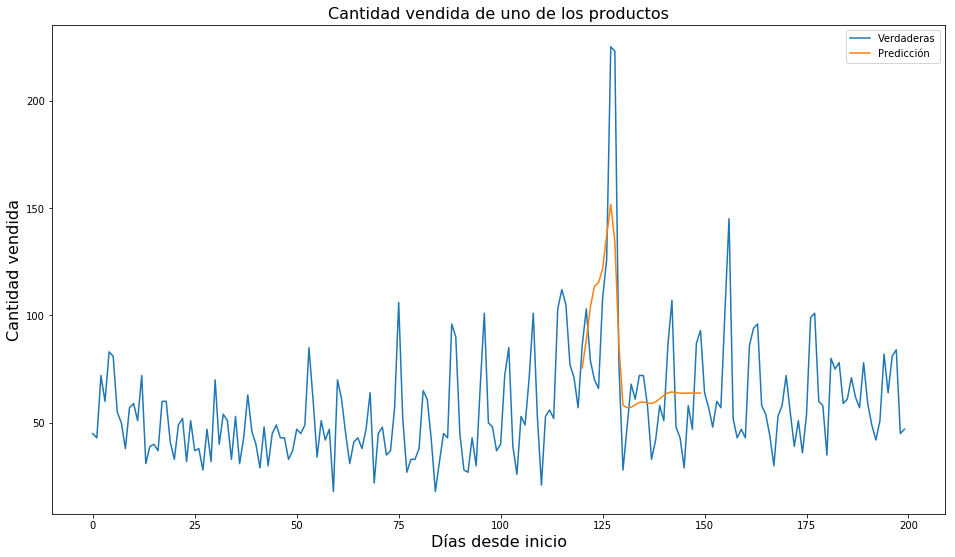

In [0]:
import matplotlib as mpl
import matplotlib.pyplot as plt

tamaño = (16,9)
FONTSIZE = 16
SPOT = 30
ITEM = 0
START = 0 #Inicio de los 715 días que queremos graficar
END = 200 #Fin de las ventas originales

Originals = dataset.iloc[START:END,ITEM].to_numpy()
Predict = [output[SPOT][i][ITEM] for i in range(out)]

fig = plt.figure(figsize = tamaño)
ax = fig.add_subplot(111)
ax.plot(range(START,END), Originals, label = 'Verdaderas')
ax.plot(range(SPOT+30+days, SPOT + 30 + days + out), Predict,  label = 'Predicción')
plt.xlabel("Días desde inicio", fontsize = FONTSIZE)
plt.ylabel("Cantidad vendida", fontsize = FONTSIZE)
plt.title("Cantidad vendida de uno de los productos", fontsize = FONTSIZE)
plt.legend()
plt.show()

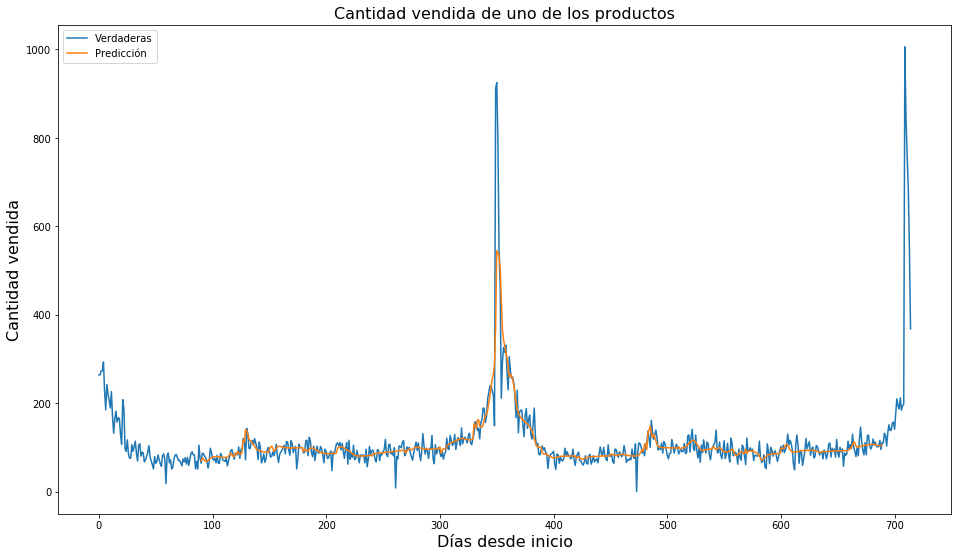

In [0]:
ITEM = 1

output = model.predict(X_train)

Originals = dataset.iloc[:,ITEM].to_numpy()
listas = np.array([output[i] for i in range(0, len(output), out)])
Predict = []
for lista in listas:
  for i in range(out):
    Predict.append( lista[i][ITEM] )
    
fig = plt.figure(figsize = tamaño)
ax = fig.add_subplot(111)
ax.plot(range(len(Originals)), Originals, label = 'Verdaderas')
ax.plot(range(30+days, len(Predict)+30+days), Predict,  label = 'Predicción')
plt.xlabel("Días desde inicio", fontsize = FONTSIZE)
plt.ylabel("Cantidad vendida", fontsize = FONTSIZE)
plt.title("Cantidad vendida de uno de los productos", fontsize = FONTSIZE)
plt.legend()
plt.show()

### Modelo alternativo

Si bien utilizamos un modelo del tipo encoder decoder para realizar las predicciones de ventas, también es posible utilizar un modelo recurrente normal para realizar el mismo trabajo, con esto nos referimos una Red neuronal recurrente que tendría *input_days* timesteps > *output_days*, de la misma forma en que hicimos en el ejercicios. Para una explicación más concreta, asumamos *input days* = 60, *output_days* = 30.

La red tendría 60 instantes de tiempo, y los leería para predecir 30 días de ventas. Esto se logra cambiando la forma de los X e Y. Los tendrían la misma forma, mientras que los Y ahora serían de la forma (sample_size, 60, 4), donde 30 de esos 60 días predecidos deberían ser *paddeados* con 0s, más específicamente, los primeros 30 días deberían ser rellenados con 0

¿Por qué los primeros 30 y nos los últimos 30? Si los ejemplos tuvieran un post padding, es decir, rellenado con 0s al final de la secuencia, se tendría que durante los primeros 30 instantes de tiempo la red predice una secuencia, utilizando sólo los 30 primeros días, y luego aprende que los últimos 30 se predicen como 0, por lo que la red no estaría prediciendo utilizando 60 días, sino 30 de estos.

Si se utiliza un pre padding, se tiene los primeros 30 días de preddicción de la red serán 0, pero esto no es inutil, ya que la red tiene 'guardado en memoria' estos primeros 30 días, que utilizará para predecir los 30 días, junto con otros 30 días de input.

### Mejorando la performance sin Redes Neuronales

Si bien existen muchas maneras de poder mejorar el desempeño de la red cambiando hiperparámetros como cantidad de capas escondnidas, cantidad de neuronas, regularizadores, modelo, etc, también es posible mejorarla cambiando otro tipo de cosas, tales como



*   Relación de productos: En este ejercicio sólo estamos prediciendo 4 productos, pero tenemos más de 400.000 otros productos para usar como predictores. Si bien utilizamos los 100 items que más aparecen a lo largo de los dos años, es posible que sea mejor utilizar otro tipo de productos entre esos 100, como algunos que se relacionen con los objetos que queremos predecir. Por ejemplo, si queremos predecir sólo 4 tipos de zapatos, puede ser útil utilizar 100 tipos de zapatos diferentes, o variantes, como zapatillas, ya que estos posiblemente tienen mayor relación entre sí que los 4 con 100 items aleatorios que hemos elegido en este caso.
*   Días Outliers: Si bien nos hemos dehecho de items que podrían ser outliers, como aquellos que se vendieron pocos días durante el año, también es posible elimianr completamente todos los días en que las ventas no representan el resto del año, como por ejemplo Cyber Day, día del padre, día de la madre, Navidad, entre otros, ya que estos generlmente tienen un estudio dedicado, por la cantidad de productos extras que se venden.
*   Categorización de días: también es posible introducir un nuevo parámetro a la red, la cual sería el número del día de la semana o del mes a la red, ya que frecuentemente existen patrones sobre los días de la semana o del mes, como que se venda más los fines de semana, o los días de pago.
*   Split de test al final de los días: Algo dado en ejercicios con series de tiempo es realizar los splits al final de los días, es decir, si tomamos un conjunto de validación, este serán el último 10%, por ejemplo, de los ejemplos, en orden cronológico.


<a id="primero"></a>
# 1. RNN sobre texto
---

Hoy en dı́a, una aplicación relevante de las redes neuronales recurrentes es el modelamiento de texto y lenguaje natural. En esta sección abordaremos el problema de procesar sentencias de texto, proporcionadas por GMB (*Groningen Meaning Bank*), para reconocimiento de entidades y *tagger*. En específico, trabajaremos con el dataset proprocionado a través de __[Kaggle](https://www.kaggle.com/abhinavwalia95/entity-annotated-corpus)__, que está compuesto por más de un millón de palabras, a fin de realizar predicciones sobre distintas tareas de redes recurrentes.

<img src="https://i.stack.imgur.com/b4sus.jpg" width="70%" />


Descargue los datos de la página de __[Kaggle](https://www.kaggle.com/abhinavwalia95/entity-annotated-corpus)__ y cárguelos mediante *pandas*.

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
df_ner = pd.read_csv('/content/drive/My Drive/ner.csv', encoding ="cp1252", error_bad_lines=False)
df_ner.dropna(inplace=True)

b'Skipping line 281837: expected 25 fields, saw 34\n'


## A 
En esta primera instancia trabajaremos con la tarea de realizar un NER *tag* (**Named Entity Recognition**) sobre cada una de las palabras en las sentencias que se nos presenta en los datos. Esta tarea es del tipo *many to many*, es decir, la entrada es una secuencia y la salida es una secuencia, sin *shift*, por lo que necesitaremos una estructura de red adecuada a ésto. En primer lugar extraiga las columnas que utilizaremos del dataset **¿Por qué es conveniente utilizar *lemma* en vez de la misma palabra?**
```python
dataset = df_ner.loc[:,["lemma","word","pos","tag","prev-iob"]]
```
Luego de esto cree una estructura que contendrá todas las sentencias u oraciones (lista de *lemmas*) y otra estructura que contendrá las etiquetas (lista de *tags*). **¿Cuales son las dimensiones de ambas estructuras? ¿Cada dato de ejemplo tiene las mismas dimensiones que el resto?**
```python
n_used = 500000 #data to use-- your choice
dataX_raw,dataY_raw = [],[]
lemmas,labels = set(), set()  #uniques
for fila in dataset.values[:n_used]:
    if fila[-1]=="__START1__": 
        dataX_raw.append(sentence)
        dataY_raw.append(labels_sentence)
        sentence= []
        labels_sentence = []
    lemmas.add(fila[0])
    labels.add(fila[3])
    sentence.append(fila[0]) #add lemma
    labels_sentence.append(fila[3]) #TAG
dataX_raw = dataX_raw[1:]
dataY_raw = dataY_raw[1:]
```

In [0]:
dataset = df_ner.loc[:,["lemma","word","pos","tag","prev-iob"]]

Es mejor utilizar los lemas ya que estos representan el "Header" de una palabra, por lo que palabras que son parecidas o variaciones van a ser tomadas como una sola palabra que las represente a todas, aumentando la frecuencia de esta palabra. A parte de esto, se usan lemas ya que estos son capaces de ver el contexto donde esta usada una palabra lo que puede ayudar a la red neuronal a categorizar en el tag mas apropiado.

In [0]:
n_used = 500000 #data to use-- your choice
sentence = None
labels_sentence = None
dataX_raw,dataY_raw = [],[]
lemmas,labels = set(), set()  #uniques
for fila in dataset.values[:n_used]:
    if fila[-1]=="__START1__": 
        dataX_raw.append(sentence)
        dataY_raw.append(labels_sentence)
        sentence = []
        labels_sentence = []
    lemmas.add(fila[0])
    labels.add(fila[3])
    sentence.append(fila[0]) #add lemma
    labels_sentence.append(fila[3]) #TAG
dataX_raw = dataX_raw[1:]
dataY_raw = dataY_raw[1:]


In [0]:
print(dataX_raw[0])

['thousand', 'of', 'demonstr', 'have', 'march', 'through', 'london', 'to', 'protest', 'the', 'war', 'in', 'iraq', 'and', 'demand', 'the', 'withdraw', 'of', 'british', 'troop', 'from', 'that', 'countri', '.']


In [0]:
print(len(dataX_raw))
print(len(dataX_raw[0]))
print(len(dataX_raw[1]))
print(len(dataY_raw))
print(len(dataY_raw[1]))

22901
24
30
22901
30


Hay un total de 22901 datos de sentencia y de tags. Sin embargo, cada dato de entrada tiene dimensiones distintas, esto puede deberse a que los datos de entrada son oraciones, por lo que cada oración va a tener largos distintos. 

## B
Estudie la distribución del largo de los textos a procesar. Estudie también la frecuencia con la que aparecen las palabras en todo el dataset. **¿Se observa una ley Zipf?**[[1]](#refs) Realice un gráfico de la cantidad de datos por clase. Comente.

In [0]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
largos_textos=[]
for i in dataX_raw:
  largo_word=0
  for j in i:
    largo_word+=1
  largos_textos.append(largo_word)

print(largos_textos)
  

[24, 30, 14, 15, 25, 24, 21, 28, 15, 25, 12, 34, 29, 26, 40, 10, 22, 34, 20, 24, 23, 29, 25, 32, 14, 23, 19, 19, 25, 7, 29, 22, 25, 26, 35, 30, 21, 34, 10, 21, 27, 19, 35, 29, 24, 24, 26, 10, 9, 23, 22, 38, 39, 14, 17, 20, 24, 31, 22, 9, 15, 7, 24, 34, 8, 41, 26, 34, 32, 21, 7, 17, 14, 29, 21, 30, 38, 22, 14, 24, 30, 20, 18, 25, 11, 17, 20, 21, 29, 14, 28, 24, 20, 27, 7, 34, 12, 32, 25, 32, 13, 16, 18, 13, 28, 9, 18, 18, 20, 12, 26, 10, 28, 32, 22, 20, 26, 21, 11, 34, 27, 14, 15, 24, 14, 34, 26, 18, 19, 23, 21, 24, 28, 13, 23, 22, 23, 18, 23, 38, 26, 15, 24, 25, 33, 25, 20, 36, 19, 9, 16, 20, 27, 4, 36, 24, 40, 32, 18, 21, 24, 11, 17, 11, 17, 28, 21, 15, 26, 14, 20, 17, 25, 28, 7, 21, 22, 10, 12, 20, 6, 10, 28, 17, 21, 41, 25, 19, 35, 23, 23, 17, 25, 18, 20, 27, 25, 18, 21, 28, 30, 20, 6, 31, 17, 30, 18, 27, 25, 15, 24, 11, 25, 26, 40, 17, 26, 30, 30, 29, 21, 22, 30, 21, 15, 14, 15, 22, 12, 22, 20, 27, 17, 27, 30, 26, 28, 24, 8, 21, 21, 15, 15, 27, 30, 34, 20, 18, 17, 13, 23, 10, 12, 1

(array([3.000e+00, 4.000e+00, 2.000e+00, 2.400e+01, 6.700e+01, 1.590e+02,
        1.970e+02, 2.790e+02, 3.810e+02, 4.560e+02, 5.680e+02, 6.000e+02,
        6.910e+02, 8.090e+02, 9.210e+02, 9.220e+02, 9.420e+02, 1.112e+03,
        1.044e+03, 1.182e+03, 1.165e+03, 1.138e+03, 1.048e+03, 1.053e+03,
        1.073e+03, 8.990e+02, 8.820e+02, 8.210e+02, 7.450e+02, 5.850e+02,
        5.940e+02, 4.800e+02, 3.380e+02, 3.390e+02, 2.700e+02, 2.260e+02,
        1.580e+02, 1.630e+02, 1.390e+02, 9.600e+01, 7.200e+01, 4.600e+01,
        4.000e+01, 2.900e+01, 1.700e+01, 2.200e+01, 2.100e+01, 1.800e+01,
        1.400e+01, 1.100e+01, 2.000e+00, 8.000e+00, 2.000e+00, 2.000e+00,
        2.000e+00, 5.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 6.000e+00,
        2.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26

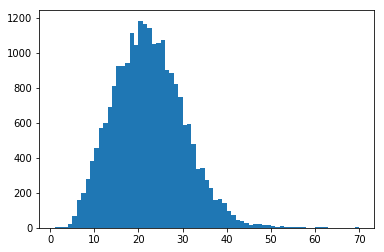

In [0]:
import matplotlib.pyplot as plt
plt.hist(largos_textos,range=(1,max(largos_textos)), bins=max(largos_textos)-1)

Como se puede apreciar en el gráfico, los textos de largo 20 son los que tienen mayor frecuencia en el dataset, mientras que textos muy largos o muy cortos tienen poco frecuencia en el dataset, siendo el largo máximo 70 y el mínimo 1. La forma del gráfico es muy parecida a una normal, con media en aproximada en el 20.

In [0]:
palabras=[]
for i in dataX_raw:
  for j in i:
    palabras.append(j)
  

palabras2=[word for word in palabras if word not in stop_words]     
#Cambiar palabras por palabras2 para ver resultados sin stopwords


largos=map(len,palabras)
largos=list(largos)
largos2=map(len,palabras2)
largos2=list(largos2)


[53738, 139176, 254925, 347168, 335390, 380856, 261114, 143584, 84060, 47010, 32054, 10536, 7423, 3962, 3030, 1136, 510, 972, 456, 380, 105, 66, 0, 48, 0, 0, 54, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 128]


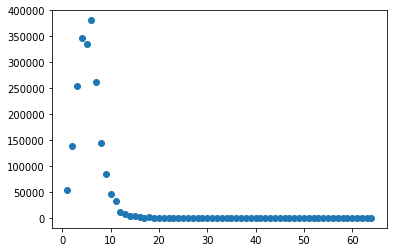

In [0]:
import matplotlib.pyplot as plt
lista = [sum(j for j in largos if j == i) for i in range(1, max(largos)+1  )]
print(lista)
plt.scatter(np.linspace(1,max(largos), num = max(largos)),lista)
#Largos de palabras considerando stopwords


[42552, 17594, 72222, 252596, 301915, 379518, 250488, 143560, 84060, 47010, 32054, 10536, 7423, 3962, 3030, 1136, 510, 972, 456, 380, 105, 66, 0, 48, 0, 0, 54, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 128]


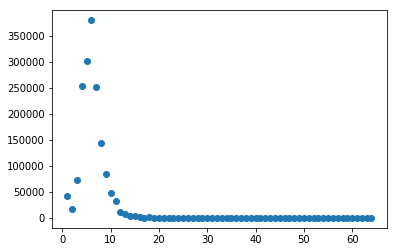

In [0]:
import matplotlib.pyplot as plt
lista = [sum(j for j in largos2 if j == i) for i in range(1, max(largos2)+1  )]
print(lista)
plt.scatter(np.linspace(1,max(largos2), num = max(largos2)),lista)
#Largos de palabras considerando stopwords

Como se puede apreciar, el gráfico de frecuencias de las palabras sigue una distribución de ZipF, esto quiere decir que la frecuencia del largo de las palabras estan relacionadas con la función 1/x.  Al remover las stopwords, la única gran diferencia en la distribución es que las palabras de largo menor a 4 aproximadamente tienen menor frecuencia. De hecho, si se hiciera un corte al gráfico en el punto de máxima frecuencia, se observaría la distribución de ZipF sin problema.

In [0]:

dic={}
list1=[]
list2=[]
for i in palabras2:
  if i in dic:
    dic[i][0]+=1
  else:
    dic[i]=[1,largos2[palabras2.index(i)]]

for i in dic:
  list1.append(dic[i][0])
  list2.append(dic[i][1])


In [0]:
datos=pd.DataFrame(list(zip(dic.keys(), list1, list2)), 
               columns =['Palabra', 'Frecuencia','Largo']) 
datos.sort_values("Frecuencia",ascending=False).head(30)

Palabra  Frecuencia  Largo
12          .       22825      1
64          ,       15448      1
45         's        5150      2
94        say        4634      3
132      said        2528      4
93     offici        1968      6
113      u.s.        1902      4
15       kill        1839      4
21          "        1648      1
129    presid        1626      6
634       mr.        1492      3
230    govern        1470      6
142       two        1372      3
255     peopl        1368      5
166     state        1354      5
11    countri        1334      7
224    report        1283      6
177    attack        1218      6
419      year        1127      4
417      also        1116      4
141    nation        1072      6
467      unit        1060      4
429    minist         976      6
240  militari         953      8
128       new         953      3
175     group         906      5
33      polic         902      5
6        iraq         878      4
253      last         872      4
261      forc         871      4

Como se puede apreciar en la tabla, al quitar stopwords, algunas de las palabras más comunes son "say" "office" "US" "Kill" "Goverment", esto puede indicar que los textos tienen una alta tendencia pólitica, y que estas palabras son bastantes utilizadas en las frases del dataset, por lo que esto podría llegar a influenciar la información de los taggers.

## C
Para representar cada posible *tag* y *lemma* de modo que la red pueda manejarlo, será necesario codificarlos a un número único (*indice*) ¿Cuántos *tags* y *lemmas* distintos existen?  Comente sobre el significado del *tag* para cada *lemma*. **Finalmente mida el largo máximo de entre todas las sentencias**.
```python
n_labels = len(labels)
lab2idx = {t: i for i, t in enumerate(labels)}
dataY = [[lab2idx[ner] for ner in ner_tags ] for ner_tags in dataY_raw] #Converting tags to indexs
n_lemmas = len(lemmas)
lemma2idx = {w: i for i, w in enumerate(lemmas)} 
dataX = [[lemma2idx[lemma] for lemma in sentence ] for sentence in dataX_raw] #Converting text to indexs
```

In [0]:
n_labels = len(labels)
lab2idx = {t: i for i, t in enumerate(labels)}
dataY = [[lab2idx[ner] for ner in ner_tags ] for ner_tags in dataY_raw] #Converting tags to indexs
n_lemmas = len(lemmas)
lemma2idx = {w: i for i, w in enumerate(lemmas)} 
dataX = [[lemma2idx[lemma] for lemma in sentence ] for sentence in dataX_raw] 

[[15, 15, 15, 15, 15, 15, 11, 15, 15, 15, 15, 15, 11, 15, 15, 15, 15, 15, 6, 15, 15, 15, 15, 15], [15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 7, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15], [15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 11, 3, 15], [15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15], [15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 11, 15, 15, 16, 14, 15, 15, 15, 6, 15, 15, 15, 11, 15], [15, 15, 15, 15, 15, 6, 15, 15, 15, 15, 11, 15, 15, 15, 15, 15, 15, 15, 6, 15, 15, 15, 15, 15], [15, 11, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 11, 15, 11, 15, 15, 11, 15], [15, 16, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 11, 8, 15, 15, 15, 15, 15, 6, 15, 15, 15, 15, 15, 15, 15], [6, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 11, 15, 15, 15], [6, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 8, 15, 15, 15, 16, 15, 15, 15, 15, 15], [15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15], [15, 16, 14, 15, 15, 6, 15, 15, 15, 15, 15, 15, 6, 15, 1

In [0]:
print(n_labels)
print(n_lemmas)
print(lab2idx)

18
12451
{'B-eve': 0, 'B-tim': 1, 'B-org': 2, 'I-art': 3, 'I-gpe': 4, 'I-eve': 5, 'I-org': 6, 'B-art': 7, 'B-per': 8, 'I-nat': 9, 'I-geo': 10, 'I-per': 11, 'B-nat': 12, 'B-gpe': 13, 'I-tim': 14, 'B-geo': 15, 'O': 16, 'Mono': 17}


Existen en el dataset un total de 17 tags y 12450 lemmas.  Un tag para un lemma puede significar un etiquedado morfológico, que es basicamente etiquetar cada lemma en una categoría para poder descubrir algo de la palabra. Por ejemplo, se podría usar un sistema de tags para saber si una palabra es singular o plural en el contexto de una oración.


El largo máximo entre todas las sentencias es 61.

## D
Debido a la distinta extensión de textos se deberá **realizar *padding* para estandarizar el largo**,
considere algun carácter especial **no presente en el vocabulario** para codificar el espacio en blanco en ambos (entrada y salida), por ejemplo si el largo máximo es de 4 y se tiene la sentencia "the rocket" codificada como [32,4] será necesario agregar un *lemma* que codificado significará el fin de la sentencia "the rocket *ENDPAD ENDPAD*" que codificado quedará como [32,4,*N, N*]. Decida, respecto al cómo funciona una red recurrente y su *memoria*, sobre qué le parece más conveniente al momento de rellenar con un valor especial ¿Al principio o al final de la sentencia? Comente
```python
lemma2idx["END"] = n_lemmas #add fullfill lemma and tag to the dictionary
lab2idx["END"] = n_labels
n_labels +=1
n_lemmas +=1
from keras.preprocessing import sequence
X = sequence.pad_sequences(dataX, maxlen=max_input_lenght,padding='pre' or 'post',value=lemma2idx["yourspecialcharacter"])
y = sequence.pad_sequences(dataY, maxlen=max_input_lenght,padding='pre' or 'post',value=lab2idx["endtagger"])
del dataY[:],dataX[:]
```

In [0]:
lemma2idx["Mono"] = n_lemmas #add fullfill lemma and tag to the dictionary
lab2idx["Mono"] = n_labels
n_labels +=1
n_lemmas +=1
from keras.preprocessing import sequence
X = sequence.pad_sequences(dataX, maxlen=70,padding='pre',value=lemma2idx["Mono"])
y = sequence.pad_sequences(dataY, maxlen=70,padding='pre',value=lab2idx["Mono"])
#del dataX[:]
#del dataY[:]


Las redes recurrentes toman el estado final para realizar la siguiente predicción, por esto es que en este tipo de redes es mas conveniente que el input "util" este al final de la sentencia y no al principio, si fuera al final, la red se alimentaria de muchos 0 para llegar al estado final, lo que podría generar perdida de precisión. Por esto es mejor usar pre-padding.

## E
Para poder generar una representación adecuada sobre los datos de entrada que permita realizar operaciones lineales, deberá generar una representación a un vector denso. Para ésto se utilizará la arquitectura de autoencoder **Word2Vec** [[2]](#refs) sobre textos *raws* de largo variable, en donde el *encoder* codifica una palabra categórica (*target*) a un vector denso de dimensionalidad $d$ mientras que el *decoder* genera palabras en el contexto (*context*) de la palabra *target* (en una vecindad alrededor). La idea detrás es que palabras similares sean proyectadas a una región cercana en el espacio de *embedding* ¿Cuál es la importancia del parámetro min_count? ¿Cuántos *lemmas* ve Word2Vec?
```python
from gensim.models import Word2Vec
EMBEDDING_DIM = 32
window_size = 5
nb_epoch = 5
batch_size = 6000
min_count = 3
model = Word2Vec(dataX_raw,size=EMBEDDING_DIM,window=window_size,batch_words=batch_size,iter=nb_epoch,
                 min_count=min_count, negative=5,sg=1) #sg=1 mean skip-gram
embeddings_index = {vocab_word: model.wv[vocab_word] for vocab_word in model.wv.vocab}
len(embeddings_index.keys())
```
Genere una matriz de *embeddings* que se utilizarán como capa neuronal.
```python
embedding_matrix = np.zeros((n_lemmas, EMBEDDING_DIM))
for word, i in lemma2idx.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: #if word does not has embedding
        embedding_matrix[i] = embedding_vector
```
Luego, para poder realizar una clasificación sobre los datos en la salida será necesario representarlos *one hot vectors*, esto resultará en un arreglo tridimensional.
```python
from keras.utils import to_categorical
y = np.asarray([to_categorical(i, num_classes=n_labels) for i in y])
```

In [0]:
from gensim.models import Word2Vec
EMBEDDING_DIM = 32
window_size = 10
nb_epoch = 5
batch_size = 6000
min_count = 3
model = Word2Vec(dataX_raw,size=EMBEDDING_DIM,window=window_size,batch_words=batch_size,iter=nb_epoch,
                 min_count=min_count, negative=5,sg=1) #sg=1 mean skip-gram
embeddings_index = {vocab_word: model.wv[vocab_word] for vocab_word in model.wv.vocab}
len(embeddings_index.keys())

6957

El parámetro Min_count determina de que largo son los textos (en palabras) que se van a considerar, por lo que textos de largo menor a min_count no son considerados en el codificador. Dicho lo anterior Word2Vec ve 6957 lemmas.

In [0]:
embedding_matrix = np.zeros((n_lemmas, EMBEDDING_DIM))
for word, i in lemma2idx.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: #if word does not has embedding
        embedding_matrix[i] = embedding_vector

In [0]:
from keras.utils import to_categorical
y_idx=y
y = np.asarray([to_categorical(i, num_classes=n_labels) for i in y])

In [0]:
print(y_idx.shape)
print(y.shape)

(22901, 70)
(22901, 70, 18)


## F
Luego de esto cree los conjuntos de entrenamiento y de prueba con el código a continuación **¿Cuáles son las dimensiones de entrada y salida de cada conjunto?** Comente
```python
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=22)
y_train.shape
```

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,shuffle=False)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=False)


y_train.shape

(12824, 70, 18)

In [0]:
X_train.shape

(12824, 70)

In [0]:
X_val.shape

(3206, 70)

In [0]:
y_val.shape

(3206, 70, 18)

In [0]:
X_test.shape

(6871, 70)

In [0]:
y_test.shape

(6871, 70, 18)

La dimensión de los datos de entrenamiento son 12824 textos para X e Y. Mientras que para testing se usan 6871 textos para x e y. Además, se utilizan 3206 textos para validación

g) Defina una red neuronal recurrente *many to many* con compuertas LSTM para aprender a *tagear* la entidad en el texto. Esta red debe procesar la secuencia de *lemmas* rellenados (o sin rellenar) y entregar el *tag* a cada uno de los *lemmas*, por lo que la salida de la red es una por cada instante de tiempo que se necesita entregar un *output*. La primera capa de la red a construir debe tener los vectores de *embedding* encontrados por **Word2Vec**. **Comente sobre los cambios que sufre un dato al ingresar a la red y la cantidad de parámetros de la red**. Entrene y luego evalúe su desempeño sobre ambos conjuntos. 
```python
from keras.models import Sequential
from keras.layers import LSTM, Embedding, Dense, Dropout,TimeDistributed
model = Sequential()
model.add(Embedding(input_dim=n_lemmas, output_dim=EMBEDDING_DIM, input_length=max_input_lenght,
                    trainable=False, weights = [embedding_matrix]))
model.add(LSTM(units=100,return_sequences=True))
model.add(Dropout(0.2))
model.add(TimeDistributed(Dense(n_labels, activation='softmax')))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam')
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, batch_size=128)
```
Para evaluar su modelo utilice una métrica adecuada para el desbalance presente entre las clases como identificó en el punto b). Tenga presente en este punto el **no evaluar** la clase/símbolo que añadió para realizar *padding* a los *tag*.  
*Hint: podría "truncar" la salida predicha hasta el largo real de esa sentencia*.
```python
from sklearn.metrics import f1_score
dataY_pred = model.predict_classes(X_test,verbose=0) #process... to remove prediction on "endtagger" symbol
f1_score_bydata = [f1_score(true, pred ,average='macro') for true,pred in zip(dataY,dataY_pred) ]
print("F1 score on test: ", np.mean(f1_score_bydata) )
```

In [0]:
from keras.models import Sequential
from keras.layers import LSTM, Embedding, Dense, Dropout,TimeDistributed
model = Sequential()
model.add(Embedding(input_dim=n_lemmas, output_dim=EMBEDDING_DIM, input_length=70,
                    trainable=False, weights = [embedding_matrix]))
model.add(LSTM(units=100,return_sequences=True))
model.add(Dropout(0.2))
model.add(TimeDistributed(Dense(n_labels, activation='softmax')))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam')
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=15, batch_size=128)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 70, 32)            398432    
_________________________________________________________________
lstm_3 (LSTM)                (None, 70, 100)           53200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 70, 100)           0         
_________________________________________________________________
time_distributed_3 (TimeDist (None, 70, 18)            1818      
Total params: 453,450
Trainable params: 55,018
Non-trainable params: 398,432
_________________________________________________________________
Train on 12824 samples, validate on 3206 samples
Epoch 1/15
12824/12824 [==============================] - 12s 965us/step - loss: 1.0069 - val_loss: 0.3865
Epoch 2/15
12824/12824 [==============================] - 11s 880us/step - loss: 0.3509 - val_loss: 0.3054


In [0]:
from sklearn.metrics import f1_score,precision_score, recall_score
dataY_pred = model.predict_classes(X_test,verbose=0) #process... to remove prediction on "endtagger" symbol
dataY_real=y_idx[16030:]
print(dataY_real.shape)
print(dataY_pred.shape)
f1_score_bydata = [f1_score(true, pred ,average='macro') for true,pred in zip(dataY_real,dataY_pred) ]
print("F1 score on test: ", np.mean(f1_score_bydata) )

(6871, 70)
(6871, 70)


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


F1 score on test:  0.7278391753313413


In [0]:
precision_score_bydata = [precision_score(true, pred ,average='macro') for true,pred in zip(dataY_real,dataY_pred)]
recall_score_bydata = [recall_score(true, pred ,average='macro') for true,pred in zip(dataY_real,dataY_pred)]
print("Precision score on test: ", np.mean(precision_score_bydata) )
print("Recall score on test: ", np.mean(recall_score_bydata) )

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Precision score on test:  0.7318374956113103
Recall score on test:  0.7346922404320383


Text(0.5, 1.0, 'Frecuencia de Precision')

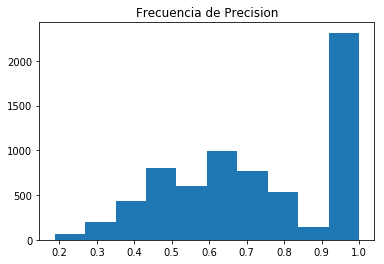

In [0]:
plt.hist(precision_score_bydata)
plt.title("Frecuencia de Precision")

Text(0.5, 1.0, 'Frecuencia de Recall')

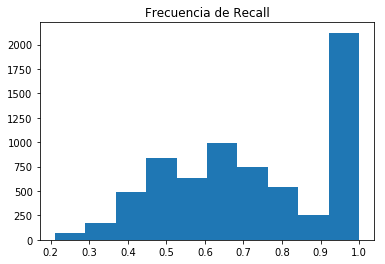

In [0]:
plt.hist(recall_score_bydata)
plt.title("Frecuencia de Recall")

Como se puede ver, los resultados de esta red neuronal son aparentemente buenos, se obtuvo un buen F1 Score, acompañado de un decente precision y recall. Pero también hay que considerar que hay un gran desbalance de clases. En el dataset hay muchas etiquetas "O", por lo que la alta presencia de estas altera la red, ya que obtener alto accuracy podría estar basado en solamente decir "O" (que estará correcto en la mayoria de los casos). Como uno se puede dar cuenta con la precision, la tasa indica que hay aproximadamente un 25% de los datos que no se están clasificando bien, además, la puntación de recall apunta a que hay un 25% de datos que no estan siendo "relevantes". Como se ve en los histogramas, la teoría anterior es cierto, de hecho, viendo las formas de los gráficos, se ve que si en ambos gráficos se removieran los valores 1, se obtendría una precisión y recall de aproximadamente 0.6. Por tanto, para los siguientes modelos, esto es lo que se intentará mejorar.

## H
Varíe con seguir entrenando la capa de embedding seteada al definir la arquitectura, ésto es cambiar a *trainable=True*, compare el desempeño y el número de parámetros (entrenables) con lo anterior. Comente

In [0]:
from keras.models import Sequential
from keras.layers import LSTM, Embedding, Dense, Dropout,TimeDistributed
model = Sequential()
model.add(Embedding(input_dim=n_lemmas, output_dim=EMBEDDING_DIM, input_length=70,
                    trainable=True, weights = [embedding_matrix]))
model.add(LSTM(units=100,return_sequences=True))
model.add(Dropout(0.2))
model.add(TimeDistributed(Dense(n_labels, activation='softmax')))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam')
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=15, batch_size=128)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 70, 32)            398432    
_________________________________________________________________
lstm_4 (LSTM)                (None, 70, 100)           53200     
_________________________________________________________________
dropout_4 (Dropout)          (None, 70, 100)           0         
_________________________________________________________________
time_distributed_4 (TimeDist (None, 70, 18)            1818      
Total params: 453,450
Trainable params: 453,450
Non-trainable params: 0
_________________________________________________________________
Train on 12824 samples, validate on 3206 samples
Epoch 1/15
12824/12824 [==============================] - 13s 1ms/step - loss: 0.8832 - val_loss: 0.3205
Epoch 2/15
12824/12824 [==============================] - 12s 931us/step - loss: 0.2821 - val_loss: 0.2344
Epoch 3

In [0]:
dataY_pred = model.predict_classes(X_test,verbose=0) #process... to remove prediction on "endtagger" symbol
f1_score_bydata = [f1_score(true, pred ,average='macro') for true,pred in zip(dataY_real,dataY_pred) ]
print("F1 score on test: ", np.mean(f1_score_bydata) )

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


F1 score on test:  0.879419081361091


In [0]:
precision_score_bydata = [precision_score(true, pred ,average='macro') for true,pred in zip(dataY_real,dataY_pred)]
recall_score_bydata = [recall_score(true, pred ,average='macro') for true,pred in zip(dataY_real,dataY_pred)]
print("Precision score on test: ", np.mean(precision_score_bydata) )
print("Recall score on test: ", np.mean(recall_score_bydata) )

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Precision score on test:  0.8840765741196469
Recall score on test:  0.8828123478590095


Text(0.5, 1.0, 'Frecuencia de Precision')

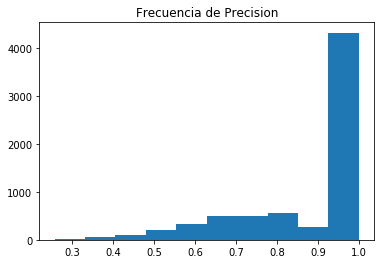

In [0]:
plt.hist(precision_score_bydata)
plt.title("Frecuencia de Precision")

Text(0.5, 1.0, 'Frecuencia de Recall')

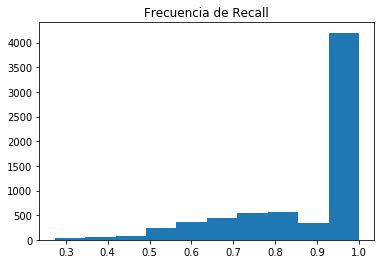

In [0]:
plt.hist(recall_score_bydata)
plt.title("Frecuencia de Recall")

Al ocupar esta red LSTM con trainable True, se obtiene, sin considerar los 1.0, una mejor precisión y recall promedio de apoximadamente 0.7 (mejor que el 0.6 obtenido en el item anterior), pero ahora hay muchas mas valores de 1.0 ( casi el doble ), por lo que existe mayor probabilidad de que se este sobrevalorando el modelo.

## I
Experimente con cambiar la *gate* de recurrencia a una con menos parámetros pero que mantiene la capacidad de memoria de la LSTM, ésta es la compuerta GRU. Comente sobre los resultados esperados y observados.
```python
from keras.layers import GRU
...
model.add(GRU(units=100,return_sequences=True))
...
```

In [0]:
from keras.layers import GRU
from keras.layers import LSTM, Embedding, Dense, Dropout,TimeDistributed
model = Sequential()
model.add(Embedding(input_dim=n_lemmas, output_dim=EMBEDDING_DIM, input_length=70,
                    trainable=False, weights = [embedding_matrix]))
model.add(GRU(units=100,return_sequences=True))
model.add(Dropout(0.2))
model.add(TimeDistributed(Dense(n_labels, activation='softmax')))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam')
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=15, batch_size=128)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 70, 32)            398432    
_________________________________________________________________
gru_1 (GRU)                  (None, 70, 100)           39900     
_________________________________________________________________
dropout_5 (Dropout)          (None, 70, 100)           0         
_________________________________________________________________
time_distributed_5 (TimeDist (None, 70, 18)            1818      
Total params: 440,150
Trainable params: 41,718
Non-trainable params: 398,432
_________________________________________________________________
Train on 12824 samples, validate on 3206 samples
Epoch 1/15
12824/12824 [==============================] - 10s 812us/step - loss: 0.9870 - val_loss: 0.3216
Epoch 2/15
12824/12824 [==============================] - 9s 726us/step - loss: 0.2805 - val_loss: 0.2366
E

In [0]:
dataY_pred = model.predict_classes(X_test,verbose=0) #process... to remove prediction on "endtagger" symbol
f1_score_bydata = [f1_score(true, pred ,average='macro') for true,pred in zip(dataY_real,dataY_pred) ]
print("F1 score on test: ", np.mean(f1_score_bydata) )

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


F1 score on test:  0.7416361903333079


In [0]:
precision_score_bydata = [precision_score(true, pred ,average='macro') for true,pred in zip(dataY_real,dataY_pred)]
recall_score_bydata = [recall_score(true, pred ,average='macro') for true,pred in zip(dataY_real,dataY_pred)]
print("Precision score on test: ", np.mean(precision_score_bydata) )
print("Recall score on test: ", np.mean(recall_score_bydata) )

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Precision score on test:  0.7464429212478791
Recall score on test:  0.7478008412756236


Text(0.5, 1.0, 'Frecuencia de Precision')

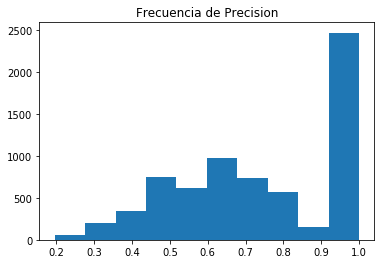

In [0]:
plt.hist(precision_score_bydata)
plt.title("Frecuencia de Precision")

Text(0.5, 1.0, 'Frecuencia de Recall')

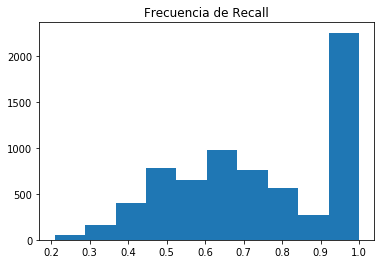

In [0]:
plt.hist(recall_score_bydata)
plt.title("Frecuencia de Recall")

El comportamiento de la red con compuerta GRU es bastante similar a la primera red utilizada (LSTM), mejoró un poco la precision y recall promedio. Además, la cantidad de datos 1.0  aumento a 2500 en vez de 2000.

## J
Algunos autores señalan la importante dependencia que existe en texto, no solo con las palabras anteriores, sino que con las que siguen. Mejore la red utilizando una red neuronal recurrente Bidireccional, es decir, con recurrencia en ambas direcciones sobre la secuencia de *lemmas*. Comente cuál debiera ser la forma correcta de usar el parámetro merge_mode (concatenar, multiplicar, sumar o promediar) para este caso. Además comente las transformaciones que sufre el patrón de entrada al pasar por las capas. ¿Mejora o empeora el desempeño? Analice.
```python
from keras.layers import Bidirectional
...
gate_layer = (LSTM or GRU )(units=100,return_sequences=True)
model.add(Bidirectional(gate_layer, merge_mode=choose))
...
```

In [0]:
from keras.layers import GRU
from keras.layers import LSTM, Embedding, Dense, Dropout,TimeDistributed
from keras.layers import Bidirectional
gate_layer = (LSTM)(units=100,return_sequences=True)
model = Sequential()
model.add(Embedding(input_dim=n_lemmas, output_dim=EMBEDDING_DIM, input_length=70,
                    trainable=False, weights = [embedding_matrix]))
model.add(Bidirectional(gate_layer, merge_mode="sum"))
#model.add(GRU(units=100,return_sequences=True))
model.add(Dropout(0.2))
model.add(TimeDistributed(Dense(n_labels, activation='softmax')))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam')
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=15, batch_size=128)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 70, 32)            398432    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 70, 100)           106400    
_________________________________________________________________
dropout_6 (Dropout)          (None, 70, 100)           0         
_________________________________________________________________
time_distributed_6 (TimeDist (None, 70, 18)            1818      
Total params: 506,650
Trainable params: 108,218
Non-trainable params: 398,432
_________________________________________________________________
Train on 12824 samples, validate on 3206 samples
Epoch 1/15
12824/12824 [==============================] - 27s 2ms/step - loss: 0.6008 - val_loss: 0.2233
Epoch 2/15
12824/12824 [==============================] - 23s 2ms/step - loss: 0.2068 - val_loss: 0.1803
Epo

In [0]:
dataY_pred = model.predict_classes(X_test,verbose=0) #process... to remove prediction on "endtagger" symbol
f1_score_bydata = [f1_score(true, pred ,average='macro') for true,pred in zip(dataY_real,dataY_pred) ]
print("F1 score on test: ", np.mean(f1_score_bydata) )

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


F1 score on test:  0.7607746470478489


In [0]:
precision_score_bydata = [precision_score(true, pred ,average='macro') for true,pred in zip(dataY_real,dataY_pred)]
recall_score_bydata = [recall_score(true, pred ,average='macro') for true,pred in zip(dataY_real,dataY_pred)]
print("Precision score on test: ", np.mean(precision_score_bydata) )
print("Recall score on test: ", np.mean(recall_score_bydata) )

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Precision score on test:  0.7658372856092278
Recall score on test:  0.7666986668077038


Text(0.5, 1.0, 'Frecuencia de Precision')

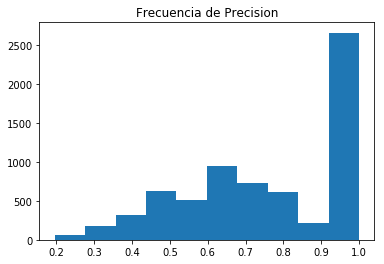

In [0]:
plt.hist(precision_score_bydata)
plt.title("Frecuencia de Precision")

Text(0.5, 1.0, 'Frecuencia de Recall')

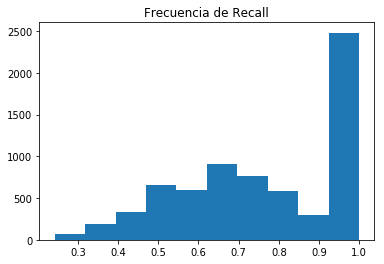

In [0]:
plt.hist(recall_score_bydata)
plt.title("Frecuencia de Recall")

El comportamiento de esta red bidireccional es relativamente mejor que las otras redes. Como se puede ver en los gráficos de precisión y recall. Hay mas valores mejores que 0.5 ( unos 1000 aproximadamente de valor 0.7 comparado con los 700 de la primera red). Además, se mantienen los 2500 ejemplos de recall 1.0. Por tanto, de las redes que fueron probadas, esta es la que aparentemente prodría haber obtenido los mejores resultados.

## K
En base a lo experimentado, **mejore el desempeño de las redes encontradas**, ya sea utilizando y/o combinando las distintas variaciones que se hicieron en los distintos ítemes, como bien alguna mejora en el pre-proceso de los datos (largo de secuencia, el tipo de *padding* o alguna otra), agregar mayor profundidad, variar el número de unidades/neuronas, utilizando otra *gate* de recurrencia (en https://keras.io/layers/recurrent/), cambiar los vectores de *embedding* por unos entrenados en otros dataset más grandes (https://nlp.stanford.edu/projects/glove/), entre otros.

In [0]:
from keras.layers import GRU
from keras.layers import LSTM, Embedding, Dense, Dropout,TimeDistributed
from keras.layers import Bidirectional
gate_layer = (LSTM)(units=100,return_sequences=True)
model = Sequential()
model.add(Embedding(input_dim=n_lemmas, output_dim=EMBEDDING_DIM, input_length=70,
                    trainable=True, weights = [embedding_matrix]))
model.add(Bidirectional(gate_layer, merge_mode="concat"))
#model.add(GRU(units=100,return_sequences=True))
model.add(Dropout(0.2))
model.add(TimeDistributed(Dense(n_labels, activation='softmax')))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adadelta')
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=25, batch_size=128)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 70, 32)            398432    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 70, 200)           106400    
_________________________________________________________________
dropout_8 (Dropout)          (None, 70, 200)           0         
_________________________________________________________________
time_distributed_8 (TimeDist (None, 70, 18)            3618      
Total params: 508,450
Trainable params: 508,450
Non-trainable params: 0
_________________________________________________________________
Train on 12824 samples, validate on 3206 samples
Epoch 1/25
12824/12824 [==============================] - 28s 2ms/step - loss: 0.5045 - val_loss: 0.2513
Epoch 2/25
12824/12824 [==============================] - 25s 2ms/step - loss: 0.2357 - val_loss: 0.2194
Epoch 3/2

In [0]:
dataY_pred = model.predict_classes(X_test,verbose=0) #process... to remove prediction on "endtagger" symbol
f1_score_bydata = [f1_score(true, pred ,average='macro') for true,pred in zip(dataY_real,dataY_pred) ]
print("F1 score on test: ", np.mean(f1_score_bydata) )

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


F1 score on test:  0.79997836326075


In [0]:
precision_score_bydata = [precision_score(true, pred ,average='macro') for true,pred in zip(dataY_real,dataY_pred)]
recall_score_bydata = [recall_score(true, pred ,average='macro') for true,pred in zip(dataY_real,dataY_pred)]
print("Precision score on test: ", np.mean(precision_score_bydata) )
print("Recall score on test: ", np.mean(recall_score_bydata) )

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Precision score on test:  0.8049454063577184
Recall score on test:  0.8059279461841068


Text(0.5, 1.0, 'Frecuencia de Precision')

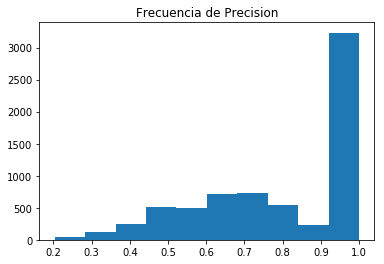

In [0]:
plt.hist(precision_score_bydata)
plt.title("Frecuencia de Precision")

Text(0.5, 1.0, 'Frecuencia de Recall')

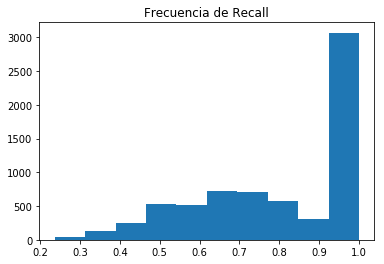

In [0]:
plt.hist(recall_score_bydata)
plt.title("Frecuencia de Recall")

La red que se tomó como base es la red J), la cual fue considerada como la red con mejor desempeño basado en su f1Score, Precision y Recall. A esta red se le cambió el parámetro de trainable a True, se añidieron 10 epochs mas(como se vé en el entrenamiento, la loss converge a 0.07 aproximadamente en el epoch 22) y se cambio la función de optimización por adaDelta. Estos cambios, aumentaron la F1Score, la precision y el recall. Además, como se ve en los gráficos, la cantidad de 1.0 aumento a 3000, pero la frecuencia de números mas altos aumentó (antes estaba un 0.7 en 1000 y ahora estan 0.7 y 0.8 en 1000), por lo que se podría decir que mejoraron levemente las predicciones considerando la sobrevaloración inicial del problema.

## L
Utilice la red con mejor desempeño encontrada, idealmente la encontrada en (j), y **muestre las predicciones** del *NER tager*, sobre algún ejemplo de pruebas, comente.  
```python
p = model.predict(np.array([X_test[i]]))
p = np.argmax(p, axis=-1)
print("{:15}: {}".format("Lemma", "Pred"))
for w,pred in zip(X_test[i],p[0]):
    print("{:15}: {}".format(lemmas[w],labels[pred]))
```

Se utilizará la red obtenida en K) (la creada), que esta basada en la realizada en el item J) (Bidireccional con LSTM)

In [0]:
escoja=2 #Cantidad de textos que desea ver
inicio=1 #Inicio de los textos a ver
for i in range(inicio,escoja+inicio): 
  print("Texto {}".format(i+1))
  p = model.predict(np.array([X_test[i]])) 
  p = np.argmax(p, axis=-1)
  print("{:15}: {:15} {}".format("Lemma", "Pred","Real"))
  for w,pred,rial in zip(X_test[i],p[0],dataY_real[i]):
      palabrota=list(lemma2idx.keys())[list(lemma2idx.values()).index(w)]
      tagito=list(lab2idx.keys())[list(lab2idx.values()).index(pred)]
      tagazo=list(lab2idx.keys())[list(lab2idx.values()).index(rial)]
      if (tagito=="Mono"): continue #Pasar predicción del tag de relleno
      print("{:15}: {:15} {}".format(palabrota,tagito,tagazo))

Texto 2
Lemma          : Pred            Real
secur          : O               O
offici         : O               O
say            : O               O
the            : O               O
airstrik       : O               O
target         : O               O
three          : O               O
suspect        : O               O
milit          : O               O
posit          : O               O
in             : O               O
orakzai        : B-geo           B-geo
region         : O               O
,              : O               O
where          : O               O
a              : O               O
militari       : O               O
transport      : O               O
helicopt       : O               O
crash          : O               O
the            : O               O
day            : B-tim           B-tim
befor          : O               I-tim
,              : O               O
kill           : O               O
at             : O               O
least          : O              

Como se puede ver, a partir de los textos 1 y 2 del testing, se obtuvieron tags similirares a los reales. El único caso a notar de aquí es el lemma "befor", que la red lo clasifico como "O" siendo en realidad I-Tim, por lo que quizas la red tenga problemas para encontrar ese tag (considerando la precision que obtuvo la red evaluada anteriormente).

# 2. Encoder-Decoder sobre imágenes
---
En la presente seccion se experimentará con arquitecturas del tipo *encoder-decoder* [[3]](#refs) aplicadas sobre imágenes, tales como *image translation*, *object location*, *image segmentation*, entre otros. La idea es aplicar una red convolucional en ambas partes del modelo (encoder y decoder), así utilizamos un modelo que se adapte a estos casos.

La tarea consistirá en realizar **Image Segmentation** [[4]](#refs) para identificar ciertos segmentos o regiones de interés en una imagen a través de procesar de manera semántica (en la codificación) si cada pixel corresponde a un segmento a destacar. Esta tarea puede ser aplicada tanto para identificar un segmento como para identificar múltiples segmentos a través de colocar varios canales/filtros de salida en el *decoder*. Para ésto trabajaremos con un dataset creado en el área (*A BENCHMARK FOR SEMANTIC IMAGE SEGMENTATION*). El dataset resulta bastante pequeño en cantidad de datos, por lo que deberá pensar en formas de conllevar ésto.

<img src="https://qph.fs.quoracdn.net/main-qimg-78a617ec1de942814c3d23dab7de0b24" width="70%" />

Descargue los datos a través del siguiente __[link](http://www.ntu.edu.sg/home/ASJFCai/Benchmark_Website/benchmark_index.html)__. Luego cargue las pocas imágenes a trabajar con la librería __[Pillow](pillow.readthedocs.io)__. Debido a la dimensionalidad variable de los datos de entrada deberá redimensionar a un valor que considere prudente, *se aconseja menos de 250*, comente su decisión.
```python
import numpy as np
import os
img_size = choose
folder = "imagefolder.."
data = [archivo.split(".")[0] for archivo in os.listdir(folder+"/image")]
from PIL import Image
X_image = []
for archivo in data:
    I = Image.open(folder+"/image/"+archivo+".jpg")
    I = np.asarray(I.resize( (img_size,img_size),Image.ANTIALIAS ))
    X_image.append(I)
X_image = np.asarray(X_image)
Y_image = []
for archivo in data:
    I = Image.open(folder+"/ground-truth/"+archivo+".png")
    I = np.asarray(I.resize( (img_size,img_size),Image.ANTIALIAS ))
    Y_image.append(I)
Y_image = np.asarray(Y_image)
```

In [0]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [0]:
import numpy as np
import os
img_size = 128
folder = "./My Drive/Semantic dataset100"
data = [archivo.split(".")[0] for archivo in os.listdir(folder+"/image")]
from PIL import Image
X_image = []
for archivo in data:
    I = Image.open(folder+"/image/"+archivo+".jpg")
    I = np.asarray(I.resize( (img_size,img_size),Image.ANTIALIAS ))
    X_image.append(I)
X_image = np.asarray(X_image)
Y_image = []
for archivo in data:
    I = Image.open(folder+"/ground-truth/"+archivo+".png")
    I = np.asarray(I.resize( (img_size,img_size),Image.ANTIALIAS ))
    Y_image.append(I)
Y_image = np.asarray(Y_image)

## A
Explore los datos a trabajar, visualice la entrada y salida del modelo, además de las dimensionalidades de éstas ¿Es un problema las dimensiones de los datos *versus* la cantidad de datos a entrenar? Normalice los datos como se acostumbra en imágenes y genere una dimensión/canal extra a la salida.
```python
...#visualize and do nice plots!
X_image = X_image/255.
Y_image = Y_image/255.
Y_image = Y_image[:,:,:,None]
```

In [0]:
import matplotlib.pyplot as plt
import ipywidgets as widgets

def function(image):
    fig, axarr = plt.subplots(1,2,figsize=(12,12))
    print(f"Dimensiones de la imagen de entrada: {X_image[image].shape}")
    axarr[0].title.set_text("Imagen de entrada")
    axarr[0].imshow(X_image[image])
    print(f"Dimensiones de la imagen de salida: {Y_image[image].shape}")
    axarr[1].title.set_text("Imagen de salida")
    axarr[1].imshow(Y_image[image])
    fig.show()
    
widgets.interact(function, image = widgets.IntSlider(min = 0,max = len(X_image),step = 1,value = 0))

interactive(children=(IntSlider(value=0, description='image'), Output()), _dom_classes=('widget-interact',))

<function __main__.function>

Se puede notar a simple vista que el objetivo es obtener clusters de los objetos presentes en el dataset entregados.

Para el caso de la primera imagen, se reconoció cada gaviota por separado y no como una clase "gaviota", además del fondo que puede no ser relevante dependiendo del caso.

Existen, además, otros casos donde solo se toman en cuenta un solo objeto en la imagen, otros donde existen muchos elementos. Este último podría tener problemas si caen muchos de esos casos en el conjunto de prueba.

In [0]:
X_image = X_image/255.
Y_image = Y_image/255.
Y_image = Y_image[:,:,:,None]
print(Y_image[0].shape)

(128, 128, 1)


A priori se puede decir que la dimensión de las imagenes afectará negativamente a la velocidad de aprendizaje de la red para la cantidad de datos de entrada. En otras palabras, para las 100 imagenes (antes de separar un conjunto de prueba y validación) que se contemplan, el tiempo de aprendizaje de la red será más lento proporcialmente al tamaño de las imagenes e inversamente proporcional al tamaño del *pooling*.

## B
Separe 10 imágenes como conjunto de pruebas para verificar la calidad del modelo entrenado.

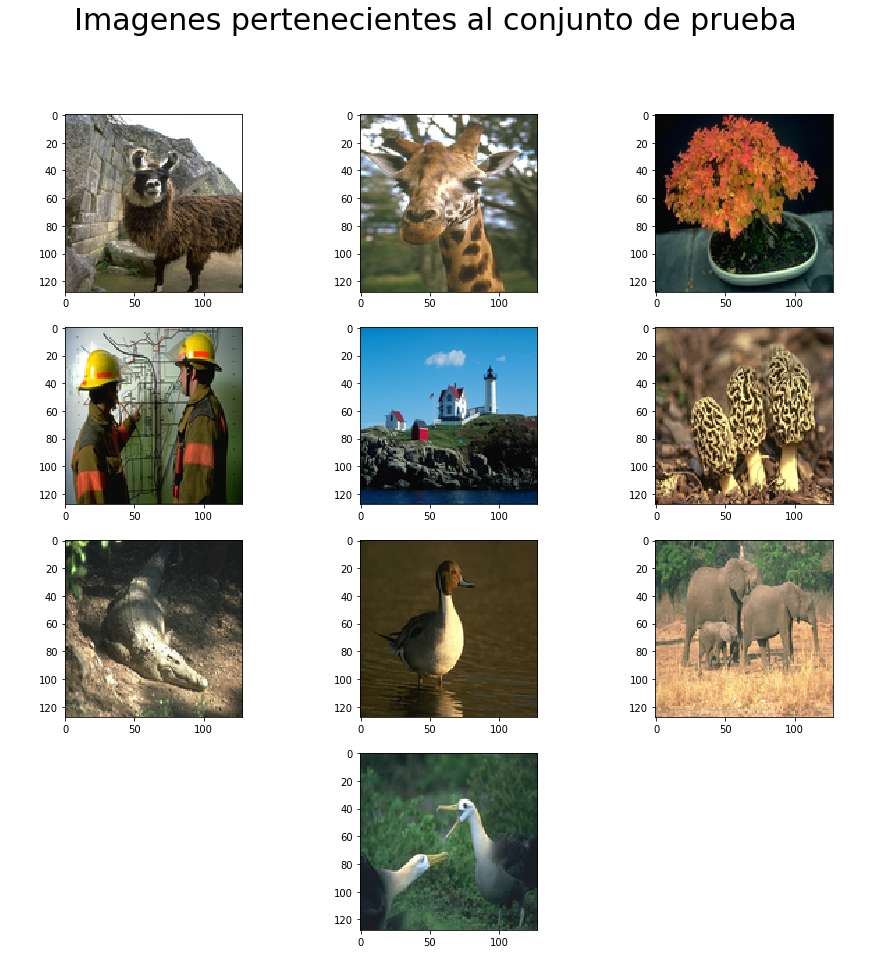

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_image, Y_image, test_size=0.1, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)
fig, axarr = plt.subplots(4,3,figsize=(15,15))
fig.suptitle("Imagenes pertenecientes al conjunto de prueba", fontsize=30)
for i in range(4):
    for j in range(3):
        if j+3*i > 8:
            axarr[i,0].axis('off')
            axarr[i,1].imshow(x_test[9])
            axarr[i,2].axis('off')
        else:
            axarr[i,j].imshow(x_test[j+3*i])

## C
Debido a la poca cantidad de datos presentes defina la arquitectura a utilizando únicamente convolucionales (*fully convolutional*) [[5]](#refs), como la presente en el código. Comente sobre los cambios en la dimensionalidad a través del *forward pass*. Decida el tamaño del *batch* en base a la cantidad de datos que se presenta para entrenar.
```python
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D, Conv2DTranspose, UpSampling2D, BatchNormalization
model = Sequential()
...#ENCODER PART
model.add(Conv2D(32, (3, 3), activation='relu', padding='same',input_shape=X_image.shape[1:]))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
...#DECODER PART
model.add(UpSampling2D((2, 2)))
model.add(Conv2DTranspose(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2DTranspose(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2DTranspose(1, (3, 3), strides=(2,2), activation='sigmoid', padding='same')) #pixel-wise classification
model.summary()
model.compile(loss='binary_crossentropy',optimizer='rmsprop')
model.fit(X_train,Y_train,epochs=100,batch_size=...)
```

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D, Conv2DTranspose, UpSampling2D, BatchNormalization
lista = []
batch = [5, 10 , 15, 30, 45, 90]
for i in range(len(batch)):
    model = Sequential()

    model.add(Conv2D(32, (3, 3), activation='relu', padding='same',input_shape=X_image.shape[1:]))
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(MaxPool2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPool2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))

    model.add(UpSampling2D((2, 2)))
    model.add(Conv2DTranspose(32, (3, 3), activation='relu', padding='same'))
    model.add(Conv2DTranspose(32, (3, 3), activation='relu', padding='same'))
    model.add(Conv2DTranspose(1, (3, 3), strides=(2,2), activation='sigmoid', padding='same')) #pixel-wise classification
    model.compile(loss='binary_crossentropy',optimizer='rmsprop', metrics=["accuracy"])
    lista.append(model)

Using TensorFlow backend.
W0801 03:12:21.255705 139780736317312 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0801 03:12:21.290356 139780736317312 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0801 03:12:21.296516 139780736317312 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0801 03:12:21.335156 139780736317312 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0801 03:12:21.389526 1397807

In [0]:
output = []
for i in range(len(lista)):
    output.append(lista[i].fit(x_train,y_train,epochs=100,batch_size=batch[i], validation_data=(x_val, y_val)))

W0801 03:12:22.782308 139780736317312 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 81 samples, validate on 9 samples
Epoch 1/100
81/81 [==============================] - 8s 96ms/step - loss: 0.6641 - acc: 0.5484 - val_loss: 0.6656 - val_acc: 0.5930
Epoch 2/100
81/81 [==============================] - 0s 3ms/step - loss: 0.6513 - acc: 0.5693 - val_loss: 0.6739 - val_acc: 0.5930
Epoch 3/100
81/81 [==============================] - 0s 3ms/step - loss: 0.6584 - acc: 0.5703 - val_loss: 0.6032 - val_acc: 0.5898
Epoch 4/100
81/81 [==============================] - 0s 3ms/step - loss: 0.6608 - acc: 0.5686 - val_loss: 0.6521 - val_acc: 0.5930
Epoch 5/100
81/81 [==============================] - 0s 3ms/step - loss: 0.6244 - acc: 0.5706 - val_loss: 0.6219 - val_acc: 0.5929
Epoch 6/100
81/81 [==============================] - 0s 3ms/step - loss: 0.6156 - acc: 0.5707 - val_loss: 0.5997 - val_acc: 0.5930
Epoch 7/100
81/81 [==============================] - 0s 3ms/step - loss: 0.6908 - acc: 0.5708 - val_loss: 0.6114 - val_acc: 0.5930
Epoch 8/100
81/81 [====================

Al tener tantos datos en el conjunto de train, el tener batch de tan gran magnitud puede hacer que el modelo aprenda de manera mas especifica sin la posibilidad de analizar y comparar las distintas instancias a como si lo haria un modelo con muchos datos de entrenamiento. Por lo tanto, lo mejor es optar a pequeños batch. Teniendo en cuenta de no caer en overfitting.

## D 
Para medir el desempeño del modelo sobre ambos conjuntos realice un análisis cualitativo en base a visualizar la segmentación que realiza *versus* la segmentación real, además de verificar el *precision* y *recall* asumiendo valores binarios de pixel ¿Qué valor debería ser más importante los ceros o 1? Comente.
```python
Y_hat_train = np.squeeze( model.predict(X_train) )
Y_hat_test = np.squeeze( model.predict(X_test) )
...#visualice Y_hat and Y_image
from sklearn.metrics import precision_score, recall_score
Y_label = Y_train.flatten() >0.5
Y_hat_label = Y_hat_train.flatten() >0.5
print(precision_score(Y_label, Y_hat_label, average=None, labels=[0,1] ))
print(recall_score(Y_label, Y_hat_label, average=None , labels=[0,1]))
```

<function matplotlib.pyplot.show>

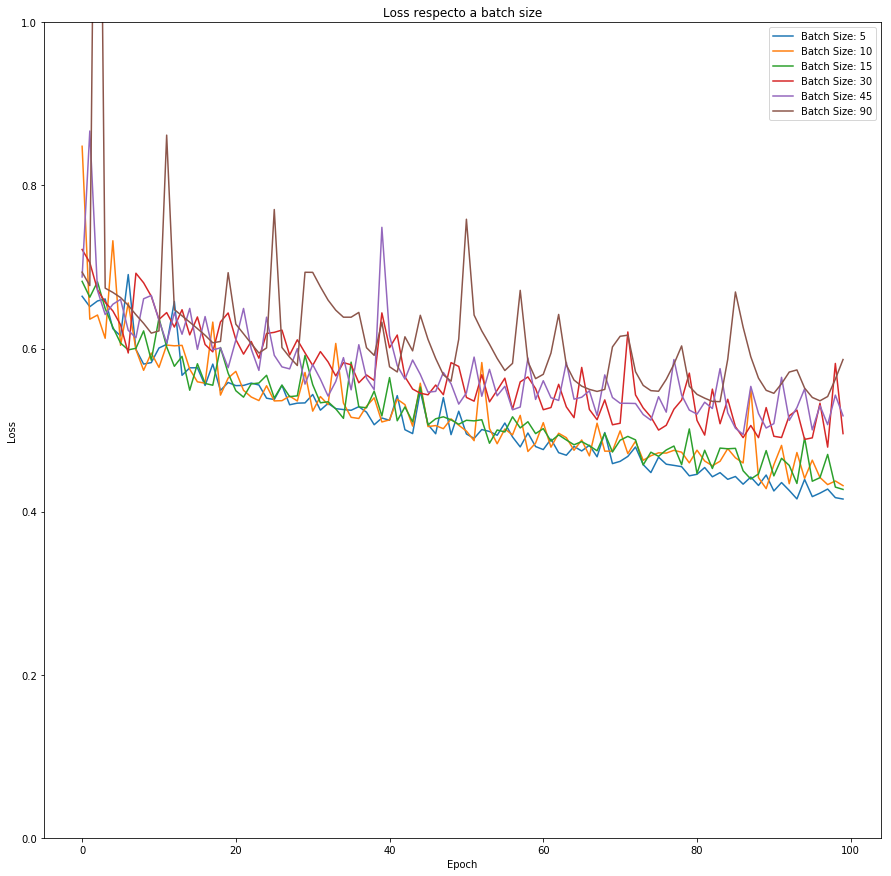

In [0]:
plt.figure(figsize=(15,15))
for i in output:
    plt.plot(i.history['loss'])
plt.ylim(0,1)
plt.title("Loss respecto a batch size")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend([f"Batch Size: {i}" for i in batch])
plt.show

<function matplotlib.pyplot.show>

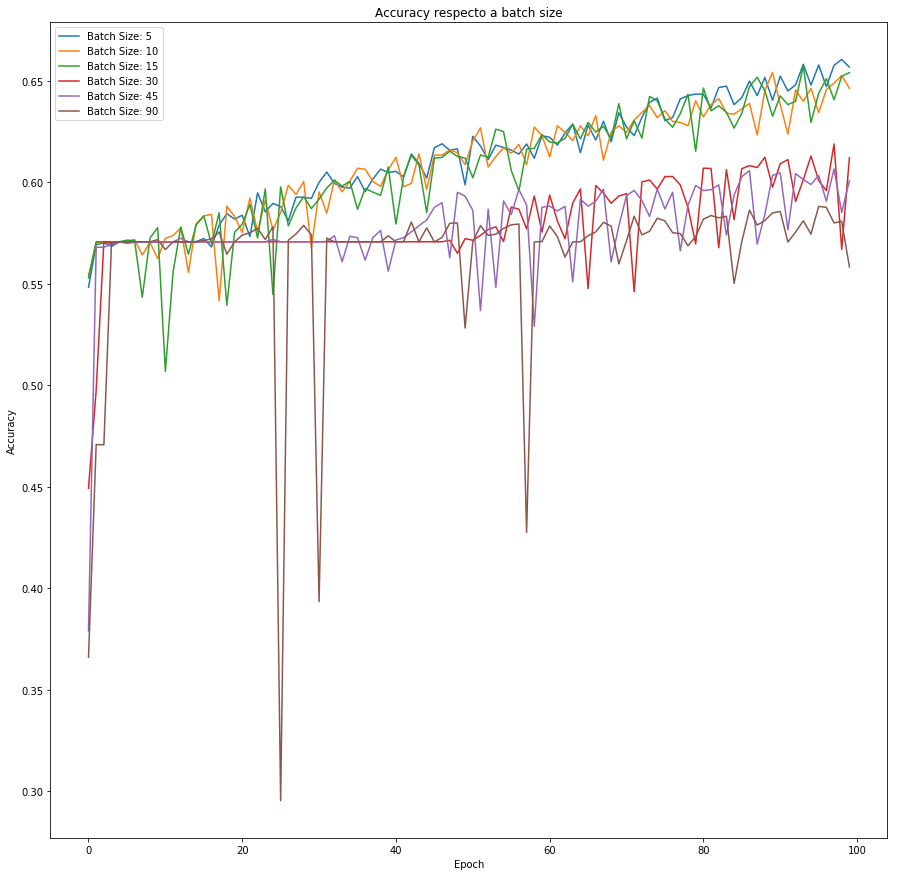

In [0]:
plt.figure(figsize=(15,15))
for i in output:
    plt.plot(i.history['acc'])
plt.title("Accuracy respecto a batch size")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend([f"Batch Size: {i}" for i in batch])
plt.show

In [0]:
y_hat_train = np.squeeze( lista[0].predict(x_train) )
y_hat_test = np.squeeze( lista[0].predict(x_test) )

In [0]:
def function(image):
    fig, axarr = plt.subplots(1,3,figsize=(12,12))
    axarr[0].title.set_text("Input")
    axarr[0].imshow(np.squeeze(x_test[image]))
    axarr[1].title.set_text("Output real")
    axarr[1].imshow(np.squeeze(y_test[image]))
    axarr[2].title.set_text("Output obtenido")
    axarr[2].imshow(y_hat_test[image])
    fig.show()

widgets.interact(function, image = widgets.IntSlider(min = 0,max = len(y_test),step = 1,value = 0))

interactive(children=(IntSlider(value=0, description='image', max=10), Output()), _dom_classes=('widget-intera…

<function __main__.function>

In [0]:
def function(image):
    fig, axarr = plt.subplots(1,3,figsize=(12,12))
    axarr[0].title.set_text("Input")
    axarr[0].imshow(np.squeeze(x_train[image]))
    axarr[1].title.set_text("Output real")
    axarr[1].imshow(np.squeeze(y_train[image]))
    axarr[2].title.set_text("Output obtenido")
    axarr[2].imshow(y_hat_train[image])
    fig.show()

widgets.interact(function, image = widgets.IntSlider(min = 0,max = len(y_train),step = 1,value = 0))

interactive(children=(IntSlider(value=0, description='image', max=81), Output()), _dom_classes=('widget-intera…

<function __main__.function>

In [0]:
from sklearn.metrics import precision_score, recall_score
Y_label = y_train.flatten() >0.5
Y_hat_label = y_hat_train.flatten() >0.5
print(precision_score(Y_label, Y_hat_label, average=None, labels=[0,1] ))
print(recall_score(Y_label, Y_hat_label, average=None , labels=[0,1]))

[0.76796704 0.77048506]
[0.94072389 0.4118013 ]


Ya que el valor de precision, evalua el numero de Verdaderos Positivos sobre la suma de los Verdaderos Positivos y los Falsos Positivos, es necesario que este numero sea lo más cercano a 1.

Por otro lado, el valor de recall evalua el numero de Verdaderos Positivos sobre la suma de los Verdaderos Positivos y los Falsos Negativos, sin embargo, es necesario que este numero, al igual que precision, sea lo más cercano a 1.

## E
Compárese con alguna técnica manual de *Image Segmentation*, comúnmente se sugiere considerar un *treshold* para activar o apagar un píxel. Experimente con utilizar *treshold* igual a la media o con otra técnica más inteligente basada en los histogramas de escala de grises, como se utilizan en *skimage*.
```python
gray_X = 0.2125*X_image[:,:,:,0]+ 0.7154*X_image[:,:,:,1]+ 0.0721*X_image[:,:,:,2] #needed gray-scale
...
""" One option"""
val = gray_X.mean()  #or another statistical
""" Another option"""
from skimage import filters
val = filters.threshold_otsu(gray_X)
... 
mask = gray_X < val
X_segmented = mask*1
```

In [0]:
gray_X = 0.2125*X_image[:,:,:,0]+ 0.7154*X_image[:,:,:,1]+ 0.0721*X_image[:,:,:,2] #needed gray-scale
""" One option"""
val = gray_X.mean()  #or another statistical
""" Another option"""
from skimage import filters
#val = filters.threshold_otsu(gray_X)
mask = gray_X < val
X_segmented = mask*1
X_segmented = X_segmented[:,:,:,None]

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X_segmented, Y_image, test_size=0.1, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', padding='same',input_shape=X_segmented.shape[1:]))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))

model.add(UpSampling2D((2, 2)))
model.add(Conv2DTranspose(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2DTranspose(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2DTranspose(1, (3, 3), strides=(2,2), activation='sigmoid', padding='same')) #pixel-wise classification
model.compile(loss='binary_crossentropy',optimizer='rmsprop', metrics=["accuracy"])
model.fit(x_train,y_train,epochs=100,batch_size=32, validation_data=(x_val, y_val))

Train on 81 samples, validate on 9 samples
Epoch 1/100
81/81 [==============================] - 1s 16ms/step - loss: 0.6591 - acc: 0.5492 - val_loss: 0.5933 - val_acc: 0.5930
Epoch 2/100
81/81 [==============================] - 0s 3ms/step - loss: 0.6335 - acc: 0.5708 - val_loss: 0.6312 - val_acc: 0.5930
Epoch 3/100
81/81 [==============================] - 0s 3ms/step - loss: 0.6322 - acc: 0.5708 - val_loss: 0.5866 - val_acc: 0.5930
Epoch 4/100
81/81 [==============================] - 0s 3ms/step - loss: 0.6088 - acc: 0.5708 - val_loss: 0.6313 - val_acc: 0.5930
Epoch 5/100
81/81 [==============================] - 0s 3ms/step - loss: 0.6075 - acc: 0.5708 - val_loss: 0.6047 - val_acc: 0.5930
Epoch 6/100
81/81 [==============================] - 0s 3ms/step - loss: 0.6046 - acc: 0.5708 - val_loss: 0.6453 - val_acc: 0.5930
Epoch 7/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5878 - acc: 0.5708 - val_loss: 0.6101 - val_acc: 0.5930
Epoch 8/100
81/81 [====================

In [0]:
print('Modelo gray scale', 'Modelo batch 30')
print('Accuracy', model.history.history['acc'][-1], lista[3].history.history['acc'][-1])
print('Loss', model.history.history['loss'][-1], lista[3].history.history['loss'][-1])

Modelo gray scale Modelo batch 30
Accuracy 0.6923790397467436 0.6120899341724537
Loss 0.338289491188379 0.4956948293579949


## F
Experimente con realizar *data augmentation* sobre el problema. Debido a que las operaciones clásicas de *augmentation* como rotar, invertir, girar, cambiarian la etiqueta de segmentación, genere una estrategia que mantenga la etiqueta/salida $Y$. Se presenta un código de ejemplo, *Denoising*, de aplicar una máscara binaria aleatoria sobre la imagen de entrada $X$, **de todas formas se espera que proponga alguna distinta**. Compare el desempeño alcanzado con la nueva red con la forma de evaluar definida en (d).
```python
from numpy.random import binomial #DENOISING IDEA
T = 100
for _ in range(T):
    noise_level = np.random.randint(4,10)/10.
    noise_mask = binomial(n=1,p=noise_level,size=X_image.shape)
    X_augmented = X_image*noise_mask
    model.fit(X_augmented,Y_image,epochs=1,batch_size=32,validation_data=(X_image,Y_image))
```

In [0]:
from numpy.random import binomial #DENOISING IDEA

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', padding='same',input_shape=X_image.shape[1:]))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))

model.add(UpSampling2D((2, 2)))
model.add(Conv2DTranspose(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2DTranspose(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2DTranspose(1, (3, 3), strides=(2,2), activation='sigmoid', padding='same')) #pixel-wise classification
model.compile(loss='binary_crossentropy',optimizer='rmsprop', metrics=["accuracy"])

T = 100
for _ in range(T):
    noise_level = np.random.randint(4,10)/10.
    noise_mask = binomial(n=1,p=noise_level,size=X_image.shape)
    X_augmented = X_image*noise_mask
    model.fit(X_augmented,Y_image,epochs=50,batch_size=32,validation_data=(X_image,Y_image))

Train on 100 samples, validate on 100 samples
Epoch 1/50
100/100 [==============================] - 2s 24ms/step - loss: 0.6788 - acc: 0.5137 - val_loss: 0.6602 - val_acc: 0.5665
Epoch 2/50
100/100 [==============================] - 0s 3ms/step - loss: 0.7712 - acc: 0.5668 - val_loss: 0.6567 - val_acc: 0.5687
Epoch 3/50
100/100 [==============================] - 0s 3ms/step - loss: 0.6403 - acc: 0.5687 - val_loss: 0.6630 - val_acc: 0.5687
Epoch 4/50
100/100 [==============================] - 0s 3ms/step - loss: 0.6487 - acc: 0.5687 - val_loss: 0.6408 - val_acc: 0.5687
Epoch 5/50
100/100 [==============================] - 0s 3ms/step - loss: 0.6221 - acc: 0.5684 - val_loss: 0.8063 - val_acc: 0.5660
Epoch 6/50
100/100 [==============================] - 0s 3ms/step - loss: 0.7391 - acc: 0.5677 - val_loss: 0.6447 - val_acc: 0.5669
Epoch 7/50
100/100 [==============================] - 0s 3ms/step - loss: 0.6257 - acc: 0.5663 - val_loss: 0.6120 - val_acc: 0.5660
Epoch 8/50
100/100 [=========

In [0]:
print('Modelo data augmentation', 'Modelo batch 30')
print('Accuracy', model.history.history['acc'][-1], lista[3].history.history['acc'][-1])
print('Loss', model.history.history['loss'][-1], lista[3].history.history['loss'][-1])

Modelo data augmentation Modelo batch 30
Accuracy 0.7210235595703125 0.6120899341724537
Loss 0.17862779527902603 0.4956948293579949


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen =  ImageDataGenerator(rotation_range=15,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               shear_range=0.01,
                               zoom_range=[0.9, 1.25],
                               horizontal_flip=True,
                               vertical_flip=False,
                               fill_mode='reflect',
                               data_format='channels_last',
                               brightness_range=[0.5, 1.5])


x_train, x_test, y_train, y_test = train_test_split(X_image, Y_image, test_size=0.1, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', padding='same',input_shape=X_image.shape[1:]))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))

model.add(UpSampling2D((2, 2)))
model.add(Conv2DTranspose(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2DTranspose(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2DTranspose(1, (3, 3), strides=(2,2), activation='sigmoid', padding='same')) #pixel-wise classification
model.compile(loss='binary_crossentropy',optimizer='rmsprop', metrics=["accuracy"])

datagen.fit(x_train)

model.fit_generator(datagen.flow(x_train, y_train, batch_size=5), steps_per_epoch=len(x_train), epochs=100, validation_data=(x_val, y_val))


Epoch 1/100
81/81 [==============================] - 3s 37ms/step - loss: 0.7480 - acc: 0.5630 - val_loss: 0.6730 - val_acc: 0.5930
Epoch 2/100
81/81 [==============================] - 2s 22ms/step - loss: 0.6295 - acc: 0.5755 - val_loss: 0.6672 - val_acc: 0.5930
Epoch 3/100
81/81 [==============================] - 2s 23ms/step - loss: 0.5990 - acc: 0.5624 - val_loss: 0.6591 - val_acc: 0.5930
Epoch 4/100
81/81 [==============================] - 2s 23ms/step - loss: 0.5887 - acc: 0.5742 - val_loss: 0.6475 - val_acc: 0.5930
Epoch 5/100
81/81 [==============================] - 2s 23ms/step - loss: 0.5919 - acc: 0.5797 - val_loss: 0.6443 - val_acc: 0.5930
Epoch 6/100
81/81 [==============================] - 2s 24ms/step - loss: 0.5810 - acc: 0.5762 - val_loss: 0.6360 - val_acc: 0.5930
Epoch 7/100
81/81 [==============================] - 2s 24ms/step - loss: 0.5801 - acc: 0.5645 - val_loss: 0.6364 - val_acc: 0.5930
Epoch 8/100
81/81 [==============================] - 2s 24ms/step - loss: 0.

In [0]:
print('Modelo data augmentation', 'Modelo batch 30')
print('Accuracy', model.history.history['acc'][-1], lista[3].history.history['acc'][-1])
print('Loss', model.history.history['loss'][-1], lista[3].history.history['loss'][-1])

Modelo data augmentation Modelo batch 30
Accuracy 0.6229424004430895 0.6120899341724537
Loss 0.48054045802587037 0.4956948293579949


## G
Intente variar la arquitectura presentada en pos de obtener un mejor modelo, basado en la evaluación realizada en (d). Recuerde tomar en cuenta la poca cantidad de datos que se tiene.

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X_image, Y_image, test_size=0.1, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)
# Aumentar kernel y misma neuronas
model1 = Sequential()

model1.add(Conv2D(32, (5, 5), activation='relu', padding='same',input_shape=X_image.shape[1:]))
model1.add(Conv2D(32, (5, 5), activation='relu', padding='same'))
model1.add(MaxPool2D((2, 2)))
model1.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
model1.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
model1.add(MaxPool2D((2, 2)))
model1.add(Conv2D(128, (5, 5), activation='relu', padding='same'))
model1.add(Conv2D(128, (5, 5), activation='relu', padding='same'))

model1.add(UpSampling2D((2, 2)))
model1.add(Conv2DTranspose(32, (5, 5), activation='relu', padding='same'))
model1.add(Conv2DTranspose(32, (5, 5), activation='relu', padding='same'))
model1.add(Conv2DTranspose(1, (5, 5), strides=(2,2), activation='sigmoid', padding='same')) #pixel-wise classification
model1.compile(loss='binary_crossentropy',optimizer='rmsprop', metrics=["accuracy"])
model1.fit(x_train,y_train,epochs=100,batch_size=5, validation_data=(x_val, y_val))

Train on 81 samples, validate on 9 samples
Epoch 1/100
81/81 [==============================] - 3s 39ms/step - loss: 0.9085 - acc: 0.5382 - val_loss: 0.6640 - val_acc: 0.5930
Epoch 2/100
81/81 [==============================] - 0s 5ms/step - loss: 0.6812 - acc: 0.5707 - val_loss: 0.6263 - val_acc: 0.5930
Epoch 3/100
81/81 [==============================] - 0s 5ms/step - loss: 0.6755 - acc: 0.5706 - val_loss: 4.1218 - val_acc: 0.5915
Epoch 4/100
81/81 [==============================] - 0s 5ms/step - loss: 0.8502 - acc: 0.5702 - val_loss: 0.6451 - val_acc: 0.5928
Epoch 5/100
81/81 [==============================] - 0s 5ms/step - loss: 0.6178 - acc: 0.5696 - val_loss: 0.5697 - val_acc: 0.5930
Epoch 6/100
81/81 [==============================] - 0s 5ms/step - loss: 0.7037 - acc: 0.5706 - val_loss: 0.6310 - val_acc: 0.5907
Epoch 7/100
81/81 [==============================] - 0s 5ms/step - loss: 0.6340 - acc: 0.5701 - val_loss: 0.6493 - val_acc: 0.5930
Epoch 8/100
81/81 [====================

In [0]:
# Aumentar kernel y disminuir neuronas
model2 = Sequential()

model2.add(Conv2D(16, (5, 5), activation='relu', padding='same',input_shape=X_image.shape[1:]))
model2.add(Conv2D(16, (5, 5), activation='relu', padding='same'))
model2.add(MaxPool2D((2, 2)))
model2.add(Conv2D(32, (5, 5), activation='relu', padding='same'))
model2.add(Conv2D(32, (5, 5), activation='relu', padding='same'))
model2.add(MaxPool2D((2, 2)))
model2.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
model2.add(Conv2D(64, (5, 5), activation='relu', padding='same'))

model2.add(UpSampling2D((2, 2)))
model2.add(Conv2DTranspose(16, (5, 5), activation='relu', padding='same'))
model2.add(Conv2DTranspose(16, (5, 5), activation='relu', padding='same'))
model2.add(Conv2DTranspose(1, (5, 5), strides=(2,2), activation='sigmoid', padding='same')) #pixel-wise classification
model2.compile(loss='binary_crossentropy',optimizer='rmsprop', metrics=["accuracy"])
model2.fit(x_train,y_train,epochs=100,batch_size=5, validation_data=(x_val, y_val))

Train on 81 samples, validate on 9 samples
Epoch 1/100
81/81 [==============================] - 2s 26ms/step - loss: 0.7467 - acc: 0.5627 - val_loss: 0.6293 - val_acc: 0.5930
Epoch 2/100
81/81 [==============================] - 0s 3ms/step - loss: 0.6365 - acc: 0.5707 - val_loss: 0.5882 - val_acc: 0.5930
Epoch 3/100
81/81 [==============================] - 0s 3ms/step - loss: 0.6338 - acc: 0.5707 - val_loss: 0.6590 - val_acc: 0.5930
Epoch 4/100
81/81 [==============================] - 0s 3ms/step - loss: 0.6239 - acc: 0.5708 - val_loss: 0.5918 - val_acc: 0.5930
Epoch 5/100
81/81 [==============================] - 0s 3ms/step - loss: 0.6197 - acc: 0.5708 - val_loss: 0.6002 - val_acc: 0.5930
Epoch 6/100
81/81 [==============================] - 0s 3ms/step - loss: 0.6369 - acc: 0.5708 - val_loss: 0.5871 - val_acc: 0.5930
Epoch 7/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5971 - acc: 0.5708 - val_loss: 0.5963 - val_acc: 0.5930
Epoch 8/100
81/81 [====================

In [0]:
# mismo kernel y disminuir neuronas
model3 = Sequential()

model3.add(Conv2D(16, (3, 3), activation='relu', padding='same',input_shape=X_image.shape[1:]))
model3.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model3.add(MaxPool2D((2, 2)))
model3.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model3.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model3.add(MaxPool2D((2, 2)))
model3.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model3.add(Conv2D(64, (3, 3), activation='relu', padding='same'))

model3.add(UpSampling2D((2, 2)))
model3.add(Conv2DTranspose(16, (3, 3), activation='relu', padding='same'))
model3.add(Conv2DTranspose(16, (3, 3), activation='relu', padding='same'))
model3.add(Conv2DTranspose(1, (3, 3), strides=(2,2), activation='sigmoid', padding='same')) #pixel-wise classification
model3.compile(loss='binary_crossentropy',optimizer='rmsprop', metrics=["accuracy"])
model3.fit(x_train,y_train,epochs=100,batch_size=5, validation_data=(x_val, y_val))

Train on 81 samples, validate on 9 samples
Epoch 1/100
81/81 [==============================] - 2s 24ms/step - loss: 0.6935 - acc: 0.5586 - val_loss: 0.6017 - val_acc: 0.5930
Epoch 2/100
81/81 [==============================] - 0s 2ms/step - loss: 0.6091 - acc: 0.5707 - val_loss: 0.5985 - val_acc: 0.5930
Epoch 3/100
81/81 [==============================] - 0s 2ms/step - loss: 0.6121 - acc: 0.5707 - val_loss: 0.5952 - val_acc: 0.5930
Epoch 4/100
81/81 [==============================] - 0s 2ms/step - loss: 0.6028 - acc: 0.5707 - val_loss: 0.5696 - val_acc: 0.5930
Epoch 5/100
81/81 [==============================] - 0s 2ms/step - loss: 0.5933 - acc: 0.5708 - val_loss: 0.6194 - val_acc: 0.5930
Epoch 6/100
81/81 [==============================] - 0s 2ms/step - loss: 0.5982 - acc: 0.5709 - val_loss: 0.5357 - val_acc: 0.5931
Epoch 7/100
81/81 [==============================] - 0s 2ms/step - loss: 0.5762 - acc: 0.5747 - val_loss: 0.6417 - val_acc: 0.5941
Epoch 8/100
81/81 [====================

In [0]:
# mas mas kernel y mismas neuronas
model4 = Sequential()

model4.add(Conv2D(32, (7, 7), activation='relu', padding='same',input_shape=X_image.shape[1:]))
model4.add(Conv2D(32, (7, 7), activation='relu', padding='same'))
model4.add(MaxPool2D((2, 2)))
model4.add(Conv2D(64, (7, 7), activation='relu', padding='same'))
model4.add(Conv2D(64, (7, 7), activation='relu', padding='same'))
model4.add(MaxPool2D((2, 2)))
model4.add(Conv2D(128, (7, 7), activation='relu', padding='same'))
model4.add(Conv2D(128, (7, 7), activation='relu', padding='same'))

model4.add(UpSampling2D((2, 2)))
model4.add(Conv2DTranspose(32, (7, 7), activation='relu', padding='same'))
model4.add(Conv2DTranspose(32, (7, 7), activation='relu', padding='same'))
model4.add(Conv2DTranspose(1, (7, 7), strides=(2,2), activation='sigmoid', padding='same')) #pixel-wise classification
model4.compile(loss='binary_crossentropy',optimizer='rmsprop', metrics=["accuracy"])
model4.fit(x_train,y_train,epochs=100,batch_size=5, validation_data=(x_val, y_val))

Train on 81 samples, validate on 9 samples
Epoch 1/100
81/81 [==============================] - 4s 47ms/step - loss: 1.0917 - acc: 0.5504 - val_loss: 0.6642 - val_acc: 0.5930
Epoch 2/100
81/81 [==============================] - 1s 10ms/step - loss: 0.6808 - acc: 0.5707 - val_loss: 0.6868 - val_acc: 0.5016
Epoch 3/100
81/81 [==============================] - 1s 9ms/step - loss: 0.7836 - acc: 0.5355 - val_loss: 0.6600 - val_acc: 0.5921
Epoch 4/100
81/81 [==============================] - 1s 10ms/step - loss: 0.6475 - acc: 0.5686 - val_loss: 0.6628 - val_acc: 0.5913
Epoch 5/100
81/81 [==============================] - 1s 10ms/step - loss: 0.6689 - acc: 0.5691 - val_loss: 0.6394 - val_acc: 0.5914
Epoch 6/100
81/81 [==============================] - 1s 10ms/step - loss: 0.9295 - acc: 0.5687 - val_loss: 0.6740 - val_acc: 0.5930
Epoch 7/100
81/81 [==============================] - 1s 10ms/step - loss: 0.8861 - acc: 0.5693 - val_loss: 0.6765 - val_acc: 0.5930
Epoch 8/100
81/81 [===============

<function matplotlib.pyplot.show>

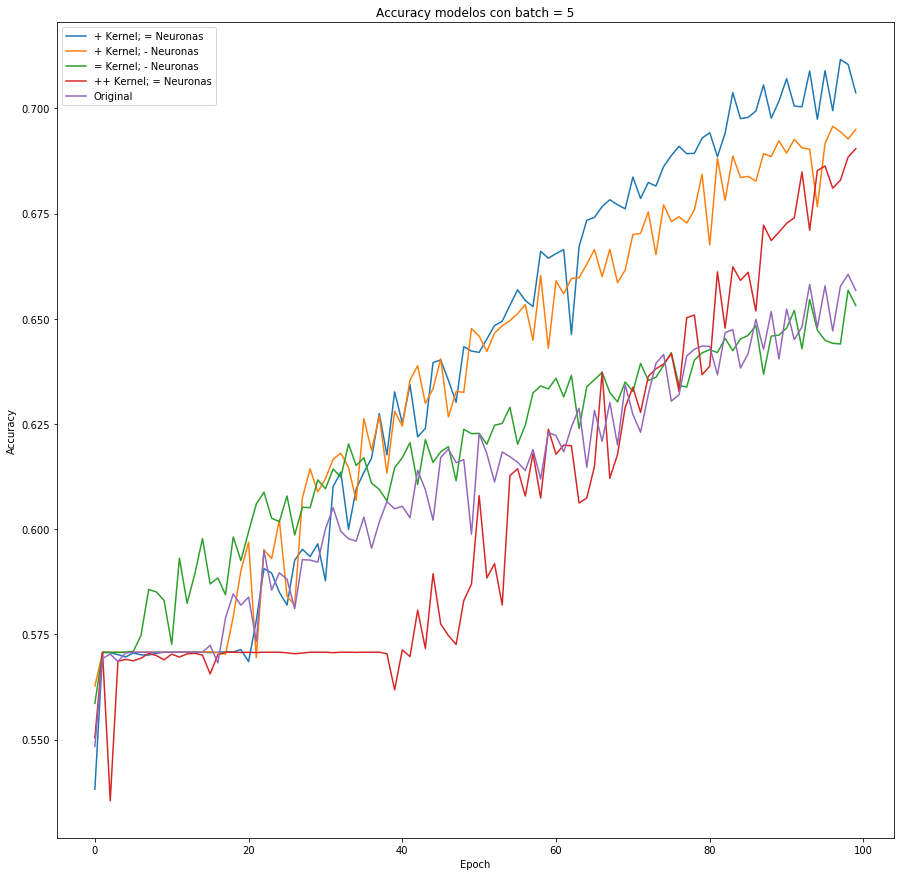

In [0]:
plt.figure(figsize=(15,15))
plt.title("Accuracy modelos con batch = 5")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(model1.history.history['acc'])
plt.plot(model2.history.history['acc'])
plt.plot(model3.history.history['acc'])
plt.plot(model4.history.history['acc'])
plt.plot(lista[0].history.history['acc'])
plt.legend(["+ Kernel; = Neuronas", "+ Kernel; - Neuronas", "= Kernel; - Neuronas", "++ Kernel; = Neuronas", "Original"])
plt.show

Para este caso, al aumentar el kernel size se obtuvo una mejor accuracy que la arquitectura original. Para esta prueba no se consideraron los datos de data augmentation, gray scale, etc. Esto para tener una idea de como poder mejorar a partir de solo los pocos datos.

Como se dijo anteriormente, al aumentar el kernel size se tuvieron buenos resultados, tanto para el conjunto de train y el de validación. Sin embargo, no fueron probados los del conjunto de test y tal vez se podría pensar en overfitting por parte de la red hacia el conjunto de train, pero al usar un conjunto de validación del cual su accuracy es aceptable, se descarta la idea del overfitting.

Otra cosa importante, es que en este ejercicio se puede obviar la idea de un conjunto de validacion y usar el conjunto de test para hacer la validacion durante el entrenamiento de la red.

<a id="tercero"></a>
# 3. *Encoder-Decoder* sobre Texto

Trabajos recientes en redes neuronales han demostrado que se puede aplicar a problemas bastante complejos gracias a la flexibilidad la definición de las redes, además de que se pueden adaptar a distintos tipos de datos brutos (dominios). Con el objetivo de explorar el enfoque anterior de *traducción* de algun tipo de dato, en esta sección deberá realizarlo con texto para traducción de un lenguaje humano a otro (e.g. inglés a alemán, chino a ruso).

<img src="https://www.panoramaila.cz/images/preklady.jpg" width="35%" />


Trabajaremos con el dataset de pares de sentencias bilingues entre distintos idiomas del proyecto __[Tatoeba](http://www.manythings.org/anki/)__. El objetivo entonces consta de tomar un texto en lenguaje natural de algún idioma (*source*) y traducirlo a otro texto en lenguaje natural de otro idioma (*target*), donde cada texto tendrá un largo variable. Lo cual se empleará a través de extrar información del texto *source* (*encoder*) para luego generar el texto *target* (*decoder*) en base a esta información extraída.


Deberá seleccionar el *dataset* que guste para trabajar con la tarea de traducción, comente sobre su decisión. Luego cárgelo con *pandas*.
```python
import pandas as pd
df = pd.read_csv("data/dataset_selected.txt", sep="\t", names=["Source","Target"])
df.head()
```

## 3a.- Traducción con redes neuronales

---

Con la flexibilidad que presentan las redes neuronales, es posible resolver problemas como la traducción de frases completas de un idioma a otro. Para ver esto, se trabajará con los datos entregados por el proyecto __[Tatoeba](http://www.manythings.org/anki/)__, específicamente el dataset de traducción de inglés a español "spa". El primer paso para poder trabajar es cargar los datos necesarios, y visualizarlos, para saber qué es lo que tenemos.

In [0]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Diego-viveros/Adition-stuff/master/spa.txt", sep="\t", names=["Source","Target"])
df.head(10)

Source   Target
0    Go.      Ve.
1    Go.    Vete.
2    Go.    Vaya.
3    Go.  Váyase.
4    Hi.    Hola.
5   Run!  ¡Corre!
6   Run.  Corred.
7   Who?  ¿Quién?
8   Wow!  ¡Órale!
9  Fire!  ¡Fuego!

La entrada que obtuvimos fue un dataset en el cual se entrega una palabra (o frase) en inglés, y se tiene su traducción al español. Como es intuitivo, una palabra existe más de una vez en el dataset con diferentes significados. Esto representa un problema al momento de realizar la traducción, ya que una palabra en inglés no producirá una sola palabra en español siempre, sino que variará, esto dependerá del contexto para el caso de las frases u oraciones.

Problemas como este son generalmente resueltos por las redes neuronales recurrentes, redes que leen un input indefinidamente, y utilizan lo que van visto anteriormente en el input como contexto, de manera que mismo input puede variar dependiendo de dónde se encuentra en la línea de inputs.

## 3b.- Pre procesamiento de los datos

Antes de trabajar con los datos, es importante limpiarlos, de manera que no incluyan cosas que no aportan y podrían causar ruido, como lo es la puntuación.

Luego, dado que el trabajo será realizado con redes neuronales, es necesario separar el conjunto de datos en conjuntos de entrenamiento, validación y pruebas, de manera que sea posible entrenar las redes, asegurándonos que se entrene de una manera correcta, y luego poder comprobar el entrenamiento.


In [0]:
import re

def clean_text(text, where=None):
    """ OJO: Sin eliminar el significado de las palabras."""
    text = text.lower()
    tokenize_text = text.split()
    tokenize_text = [re.sub(r'[^\w\s]','', word) for word in tokenize_text] #eliminar puntuacion
    #tokenize_text = [word for word in tokenize_text if word.isalpha()] #remove numbers
    if where =="target":
        tokenize_text = tokenize_text + ["#end"] 
    return tokenize_text
texts_input = list(df['Source'].apply(clean_text))
texts_output = list(df['Target'].apply(clean_text, where='target'))

In [0]:
print(texts_input[:10])
print(texts_output[:10])

[['go'], ['go'], ['go'], ['go'], ['hi'], ['run'], ['run'], ['who'], ['wow'], ['fire']]
[['ve', '#end'], ['vete', '#end'], ['vaya', '#end'], ['váyase', '#end'], ['hola', '#end'], ['corre', '#end'], ['corred', '#end'], ['quién', '#end'], ['órale', '#end'], ['fuego', '#end']]


Con esto, se dividió cada parte del par en par en cada una de las palabras, y se quitaron las puntuaciones, ya que, al agregarlas en inglés, también se deberían agregar en el español, por lo que no aporta importancia.

Si bien es posible utilizar el código sugerido, se tiene que este en vez de remover las puntuaciones, remueve toda la palabra conectada a la puntuación (por ejemplo, 'Hello.' lo detecta como una puntuación, por lo guardaba nada). 

Junto con esto, se agrega un indicador de que la traducción fue finalizada, la cual es '#end'.

In [0]:
from sklearn.model_selection import train_test_split
N_exp = 10000

print(len(texts_input))

X_train_l, X_test_l, Y_train_l, Y_test_l = train_test_split(texts_input, texts_output,
                                                            test_size=N_exp, random_state=40)
X_train_l, X_val_l, Y_train_l, Y_val_l = train_test_split(X_train_l, Y_train_l, 
                                                          test_size=N_exp, random_state=41)

print(len(X_train_l))
print(len(X_val_l))
print(len(X_test_l))
print(X_test_l[100])
print(Y_test_l[100])
print(X_val_l[100])
print(Y_val_l[100])
print(X_train_l[100])
print(Y_train_l[100])

120614
100614
10000
10000
['everyone', 'is', 'talking', 'about', 'tom']
['todo', 'el', 'mundo', 'está', 'hablando', 'de', 'tom', '#end']
['you', 'dont', 'have', 'to', 'come', 'see', 'me']
['no', 'es', 'menester', 'que', 'venga', 'a', 'verme', '#end']
['he', 'is', 'not', 'old', 'enough', 'to', 'live', 'alone']
['él', 'no', 'es', 'lo', 'suficiente', 'mayor', 'para', 'vivir', 'solo', '#end']


## 3c.- De texto a números

Una manera más fácil para la red de procesar los elementos de entrada (palabras) es asignarle un número a cada uno, de esta manera la red debe leer un int en vez de un char cada vez que lea una palabra.

In [0]:
def create_vocab(texts, min_count=1):
    count_vocab = {}
    for sentence in texts:
        for word in sentence:
            if word not in count_vocab:
                count_vocab[word] = 1
            else:
                count_vocab[word] += 1
    return [word for word,count in count_vocab.items() if count >= min_count]
  
vocab_source = create_vocab(X_train_l, min_count=3)
word2idx_s = {w: i+1 for i, w in enumerate(vocab_source)} #index (i+1) start from 1,2,3,...
idx2word_s = {i+1: w for i, w in enumerate(vocab_source)}
n_words_s = len(vocab_source) #Cantidad de palabras en el vocab de partida

vocab_target = create_vocab(Y_train_l, min_count=3)
word2idx_t = {w: i+1 for i, w in enumerate(vocab_target)}  #Converting text to numbers
idx2word_t = {i+1: w for i, w in enumerate(vocab_target)}
n_words_t = len(vocab_target) #Cantidad de palabras en el vocab de salida

Con esto, se tiene que cada palabra fue mapeada a un número de 1 a la cantidad de palabras. Sin embargo, ahora falta recrear los conjuntos anteriores utilizando estos números en vez de las palabras que teníamos

In [0]:
""" Source/input data """
dataX_train = [[word2idx_s[word] for word in sent if word in word2idx_s] for sent in X_train_l]
dataX_valid = [[word2idx_s[word] for word in sent if word in word2idx_s] for sent in X_val_l]
dataX_test = [[word2idx_s[word] for word in sent if word in word2idx_s] for sent in X_test_l]

""" Target/output data """
dataY_train = [[word2idx_t[word] for word in sent if word in word2idx_t] for sent in Y_train_l]
dataY_valid = [[word2idx_t[word] for word in sent if word in word2idx_t] for sent in Y_val_l] 
dataY_test = [[word2idx_s[word] for word in sent if word in word2idx_s] for sent in Y_test_l]

In [0]:
print(dataX_train[100])
print(X_train_l[100])
print(n_words_s, n_words_t)

[9, 26, 134, 39, 325, 28, 326, 272]
['he', 'is', 'not', 'old', 'enough', 'to', 'live', 'alone']
6605 10192


## 3d.- Padding al input

Ahora, para poder trabajar con un input de largo variable en la red neuronal, es necesario realizar padding sobre los inputs, lo que significa que, encontramos el largo máximo dentro del input, y hacemos que todas las demás frases calcen ese largo agregándole una palabra, en este caso es el número 0. Junto con esto, también se puede decidir si agregar el símbolo antes o después de la secuencia. Generalmente se elige un pre padding, ya que si se utiliza post padding, es posible que para la última iteración no se tenga espacio para el input final, por lo que la predicción no sería correcta, ya que no cupo toda la frase que tenía de output.

In [0]:
from keras.preprocessing import sequence

""" INPUT DATA (Origin language) """
max_inp_length = max(map(len, dataX_train))
print("Largo max inp: ", max_inp_length)
word2idx_s["*"] = 0 #padding symbol
idx2word_s[0] = "*"
n_words_s += 1
pad_inp = 'post'
pad_out = 'post'
X_train = sequence.pad_sequences(dataX_train, maxlen=max_inp_length, padding=pad_inp, value=word2idx_s["*"])
X_valid = sequence.pad_sequences(dataX_valid, maxlen=max_inp_length, padding=pad_inp, value=word2idx_s["*"])
X_test = sequence.pad_sequences(dataX_test, maxlen=max_inp_length, padding=pad_inp, value=word2idx_s["*"])

""" OUTPUT DATA (Destination language) """
max_out_length = max(map(len, dataY_train)) 
print("Largo max out: ",max_out_length)
word2idx_t["*"] = 0 #padding symbol
idx2word_t[0] = "*"
n_words_t += 1  
Y_train = sequence.pad_sequences(dataY_train, maxlen=max_out_length, padding=pad_out, value=word2idx_t["*"])
Y_valid = sequence.pad_sequences(dataY_valid, maxlen=max_out_length, padding=pad_out, value=word2idx_t["*"])
Y_test = sequence.pad_sequences(dataY_test, maxlen=max_out_length, padding=pad_out, value=word2idx_t["*"])
print(X_train)
print(Y_train)

Largo max inp:  45
Largo max out:  49
[[   1    2    3 ...    0    0    0]
 [   9   10   11 ...    0    0    0]
 [  14   15   16 ...    0    0    0]
 ...
 [  92 2368    0 ...    0    0    0]
 [  18   19  509 ...    0    0    0]
 [1477   47  179 ...    0    0    0]]
[[   1    2    3 ...    0    0    0]
 [  11   12   13 ...    0    0    0]
 [  16   17   18 ...    0    0    0]
 ...
 [  10    0    0 ...    0    0    0]
 [ 333   42  724 ...    0    0    0]
 [  31    6 2374 ...    0    0    0]]


In [0]:
print(X_train.shape)
print(Y_train.shape)

Junto con esto, se puede apreciar que un largo variable dependiendo del tiempo para el input sería posible, ya que con cada input se agrega 1 al largo del input del tiempo correspondiente. Este no es el caso para el largo del output a través del tiempo, ya que existen palabras en el vocabulario las cuales producen más de una palabra traducida, ya la red no puede predecir cuando necesitará aumentar su capacidad de output según el tiempo.

## 3e.- Importancia del símbolo de padding

Ya que agregamos un símbolo que no debería significar nada para la red, es necesario hacer que realmente así sea, por lo que se le dará un peso a todos los símbolos, de manera que la red se incline por alguno de ellos, y un peso 0 para el símbolo de padding, de manera que lo elija cuando no tenga otro mejor símbolo que elegir.

In [0]:
import numpy as np

c_weights = np.ones(n_words_t)
c_weights[0] = 0 #padding class masked
sample_weight = np.zeros(Y_train.shape)
for i in range(sample_weight.shape[0]):
    sample_weight[i] = c_weights[Y_train[i,:]]
    
print(sample_weight.shape)
print(n_words_s, max_inp_length)

(100614, 49)
6609 45


In [0]:
print(X_train.shape)
print(Y_train.shape)
print(Y_valid.shape)

(100614, 45)
(100614, 49)
(10000, 49)


## 3f.- Creando la red

Crearemos una red recurrente de la forma Encoder - Decoder, ya que este tipo de redes son las que pueden procesar texto y convertirlo en un texto más largo, como es el caso en el que trabajamos, donde el input más grande son 45 palabras, y el output más largo son 51 palabras.

El Encoder que creamos tiene una capa de Embedding para poder convertir el input numérico (una palabra) en un vector (un vector que representa la misma palabra), luego lo siguen dos capasrecurrentes. Para la conexión entre el Encoder y el Decoder se utiliza una capa Repeat Vector, que toma el output del encoder y se lo entrega a cada instante de tiempo del Decoder, el cual lo utiliza como input. Finalmente, se hace un decoder de dos capas, el cual en cada instante de tiempo entrega un output, representado por el TimeDistributed - Dense.

In [0]:
from keras.models import Sequential
from keras.layers import Embedding, CuDNNGRU, RepeatVector, TimeDistributed, Dense
EMBEDDING_DIM = 100

model = Sequential()
model.add(Embedding(input_dim=n_words_s, input_length=max_inp_length, output_dim=EMBEDDING_DIM))
model.add(CuDNNGRU(64, return_sequences=True))
model.add(CuDNNGRU(128, return_sequences=False))

model.add(RepeatVector(max_out_length)) #conection

model.add(CuDNNGRU(128, return_sequences=True))
model.add(CuDNNGRU(64, return_sequences=True))

model.add(TimeDistributed(Dense(n_words_t, activation='softmax')))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 45, 100)           660900    
_________________________________________________________________
cu_dnngru_14 (CuDNNGRU)      (None, 45, 64)            31872     
_________________________________________________________________
cu_dnngru_15 (CuDNNGRU)      (None, 128)               74496     
_________________________________________________________________
repeat_vector_5 (RepeatVecto (None, 49, 128)           0         
_________________________________________________________________
cu_dnngru_16 (CuDNNGRU)      (None, 49, 128)           99072     
_________________________________________________________________
cu_dnngru_17 (CuDNNGRU)      (None, 49, 64)            37248     
_________________________________________________________________
time_distributed_5 (TimeDist (None, 49, 10196)         662740    
Total para

Sin embargo, antes de poder utilizar la Red, es necesario hacerle un reshape al output deseado, ya que, el input tiene dos dimensiones de entrada (Datos, max_inp_length), pero al pasar por la capa de Embedding, este se transforma en 3 dimensiones (Datos, x_vector, y_vector), por lo que los sets de Y_train, valid y test necesitan tener 3 dimensiones, específicamente se necesita agregar una dimensión 1 al final (Datos, max_out_lenght, 1).

In [0]:
Y_train = np.reshape(Y_train, (Y_train.shape[0], Y_train.shape[1],1))
Y_valid = np.reshape(Y_valid, (Y_valid.shape[0], Y_valid.shape[1],1))
Y_test = np.reshape(Y_test, (Y_test.shape[0], Y_test.shape[1],1))

In [0]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', sample_weight_mode='temporal')

model.fit(X_train, Y_train, epochs=15, batch_size=32, validation_data=(X_valid, Y_valid),
          sample_weight = sample_weight)   

Train on 100614 samples, validate on 10000 samples
Epoch 1/15
100614/100614 [==============================] - 101s 1ms/step - loss: 5.9481 - val_loss: 14.6704
Epoch 2/15
100614/100614 [==============================] - 99s 986us/step - loss: 5.7880 - val_loss: 14.6663
Epoch 3/15
100614/100614 [==============================] - 99s 984us/step - loss: 5.7623 - val_loss: 14.6397
Epoch 4/15
100614/100614 [==============================] - 99s 984us/step - loss: 5.7500 - val_loss: 14.6655
Epoch 5/15
100614/100614 [==============================] - 99s 986us/step - loss: 5.7416 - val_loss: 14.5002
Epoch 6/15
100614/100614 [==============================] - 99s 987us/step - loss: 5.7347 - val_loss: 14.5246
Epoch 7/15
100614/100614 [==============================] - 99s 987us/step - loss: 5.7289 - val_loss: 14.5950
Epoch 8/15
100614/100614 [==============================] - 99s 985us/step - loss: 5.7241 - val_loss: 14.2886
Epoch 9/15
100614/100614 [==============================] - 99s 985us/

## 3h.- Comprobando la traducción

Para poder saber si la red aprendió de buena manera, se puede traducir cierta cantidad de ejemplos, y ver cómo se compara con lo que debería ser.
Esta es la traducción de 10 frases diferentes del conjunto de entrenamiento, seguido de 10 frases del de validación.

In [0]:
def predict_words(y_indexs, data="target"):
    """ Predict until '-#end-' is seen """
    return_val = []
    for indx_word in y_indexs:
        if indx_word != 0: #start to predict
            return_val.append(np.squeeze(indx_word))
            if data == "target": #if target is predicting
                if indx_word == word2idx_t["#end"]:
                    return return_val                
    return return_val
  
Y_set = Y_train
X_set = X_train
  
n_s = 20
idx = np.random.choice(np.arange(Y_set.shape[0]), size=n_s, replace=False)
Y_set_pred = model.predict_classes(X_set[idx] )
for i, n_sampled in enumerate(idx):
    text_input = [idx2word_s[p] for p in predict_words(X_set[n_sampled], data="source")]
    print(i+1, ".- Texto source: ", ' '.join(text_input))
    text_real = [idx2word_t[p] for p in predict_words(Y_set[n_sampled,:,0], data="target")]
    print("Texto target real: ", ' '.join( text_real))
    text_sampled = [idx2word_t[p] for p in predict_words(Y_set_pred[i], data="target")]
    print("Texto target predicho: ", ' '.join(text_sampled))

1 .- Texto source:  ive heard a lot about you
Texto target real:  he oído mucho acerca de usted #end
Texto target predicho:  tom que #end
2 .- Texto source:  the food was fingerlicking good
Texto target real:  la comida estaba como para los dedos #end
Texto target predicho:  tom que #end
3 .- Texto source:  they didnt me
Texto target real:  no me #end
Texto target predicho:  tom que #end
4 .- Texto source:  tom started to say something but mary interrupted him
Texto target real:  tom empezó a decir algo pero maría lo interrumpió #end
Texto target predicho:  tom que #end
5 .- Texto source:  your name has been dropped from the list
Texto target real:  su nombre ha sido retirado de la lista #end
Texto target predicho:  tom que #end
6 .- Texto source:  ill pretend i didnt hear that
Texto target real:  no haber oído eso #end
Texto target predicho:  tom que #end
7 .- Texto source:  do you want proof
Texto target real:  quieres pruebas #end
Texto target predicho:  tom que #end
8 .- Texto sour

In [0]:
Y_set = Y_test
X_set = X_test


idx = np.random.choice(np.arange(Y_set.shape[0]), size=n_s, replace=False)
Y_set_pred = model.predict_classes(X_set[idx] )
for i, n_sampled in enumerate(idx):
    text_input = [idx2word_s[p] for p in predict_words(X_set[n_sampled], data="source")]
    print(i+1, ".- Texto source: ", ' '.join(text_input))
    text_real = [idx2word_t[p] for p in predict_words(Y_set[n_sampled,:,0], data="target")]
    print("Texto target real: ", ' '.join( text_real))
    text_sampled = [idx2word_t[p] for p in predict_words(Y_set_pred[i], data="target")]
    print("Texto target predicho: ", ' '.join(text_sampled))

1 .- Texto source:  we had a rest in the shade
Texto target real:  vaca
Texto target predicho:  tom que #end
2 .- Texto source:  how much did you pay for the labor on this
Texto target real:  
Texto target predicho:  tom que #end
3 .- Texto source:  we had not gone very far when it started to rain
Texto target real:  ella un
Texto target predicho:  tom que #end
4 .- Texto source:  that smells good
Texto target real:  
Texto target predicho:  tom que #end
5 .- Texto source:  lets meet the day after tomorrow
Texto target real:  
Texto target predicho:  tom que #end
6 .- Texto source:  are you aware that okinawa is closer to china than to
Texto target real:  robada hace un
Texto target predicho:  tom que #end
7 .- Texto source:  he is good at mathematics
Texto target real:  
Texto target predicho:  tom que #end
8 .- Texto source:  you remember him dont you
Texto target real:  
Texto target predicho:  tom que #end
9 .- Texto source:  arent they
Texto target real:  ella tomaré
Texto target 

Se puede apreciar que para ambos conjuntos la mayoría de las traducciones no son muy efectivas. Frecuentemente, se logra traducir correctamente la mayoría de la frase, pero muchas veces falta el verboo o el actor. A su vez, se puede apreciar que a veces la red copia muchas veces la misma palabra, generalmente "Tom".

En la mayoría de los intentos, en ambos conjuntos, la red logra mantener lo más importante de la frase.

## 3g.- Encoder Convolucional

Dada la velocidad de utilizar una red completamente recurrente, se puede cambiar el Encoder de la red por una red convolucional, esperando que los tiempos de cómputo se reduzcan.

In [0]:
from keras.layers import Conv1D, MaxPool1D, GlobalMaxPooling1D, GlobalAveragePooling1D, BatchNormalization
model_conv = Sequential()
model_conv.add(Embedding(input_dim=n_words_s, output_dim=EMBEDDING_DIM, input_length=max_inp_length))
model_conv.add(Conv1D(256, 5, padding='same', activation='relu', strides=1))
model_conv.add(BatchNormalization()) #for stability
model_conv.add(Conv1D(256, 5, padding='same', activation='relu', strides=1))
model_conv.add(BatchNormalization())
model_conv.add(GlobalMaxPooling1D()) #aka to return_sequences=False
model_conv.add(RepeatVector(max_out_length)) #conection
model_conv.add(CuDNNGRU(256, return_sequences=True))
model_conv.add(TimeDistributed(Dense(n_words_t, activation='softmax')))
model_conv.summary()

model_conv.compile(optimizer='adam', loss='sparse_categorical_crossentropy', sample_weight_mode='temporal')

model_conv.fit(X_train, Y_train, epochs=20, batch_size=32, validation_data=(X_valid, Y_valid),
          sample_weight = sample_weight)  

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 45, 100)           660900    
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 45, 256)           128256    
_________________________________________________________________
batch_normalization_3 (Batch (None, 45, 256)           1024      
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 45, 256)           327936    
_________________________________________________________________
batch_normalization_4 (Batch (None, 45, 256)           1024      
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 256)               0         
_________________________________________________________________
repeat_vector_6 (RepeatVecto (None, 49, 256)           0         
__________

In [0]:
def predict_words(y_indexs, data="target"):
    """ Predict until '-#end-' is seen """
    return_val = []
    for indx_word in y_indexs:
        if indx_word != 0: #start to predict
            return_val.append(np.squeeze(indx_word))
            if data == "target": #if target is predicting
                if indx_word == word2idx_t["#end"]:
                    return return_val                
    return return_val
  
Y_set = Y_train
X_set = X_train


idx = np.random.choice(np.arange(Y_set.shape[0]), size=n_s, replace=False)
Y_set_pred = model_conv.predict_classes(X_set[idx] )
for i, n_sampled in enumerate(idx):
    text_input = [idx2word_s[p] for p in predict_words(X_set[n_sampled], data="source")]
    print(i, ".- Texto source: ", ' '.join(text_input))
    text_real = [idx2word_t[p] for p in predict_words(Y_set[n_sampled,:,0], data="target")]
    print("Texto target real: ", ' '.join( text_real))
    text_sampled = [idx2word_t[p] for p in predict_words(Y_set_pred[i], data="target")]
    print("Texto target predicho: ", ' '.join(text_sampled))

0 .- Texto source:  she used to live near him
Texto target real:  ella solía vivir cerca de él #end
Texto target predicho:  ella solía vivir cerca cerca #end
1 .- Texto source:  have you finished reading the book i lent you the other day
Texto target real:  terminaste de leer el libro que te presté el otro día #end
Texto target predicho:  terminaste el el el te que presté el otro #end
2 .- Texto source:  youre not fit to be seen
Texto target real:  así como te ves no estás en condiciones de que te vean #end
Texto target predicho:  no no estás ves que que vean vean vean vean vean vean vean vean vean vean vean vean vean #end
3 .- Texto source:  was that intended as a joke
Texto target real:  eso iba como broma #end
Texto target predicho:  eso fue como broma #end
4 .- Texto source:  hows the patient feeling this morning
Texto target real:  cómo se siente el paciente esta mañana #end
Texto target predicho:  cómo se siente el esta esta mañana #end
5 .- Texto source:  he treats me as if i am

In [0]:
Y_set = Y_test
X_set = X_test


idx = np.random.choice(np.arange(Y_set.shape[0]), size=n_s, replace=False)
Y_set_pred = model_conv.predict_classes(X_set[idx] )
for i, n_sampled in enumerate(idx):
    text_input = [idx2word_s[p] for p in predict_words(X_set[n_sampled], data="source")]
    print(i, ".- Texto source: ", ' '.join(text_input))
    text_real = [idx2word_t[p] for p in predict_words(Y_set[n_sampled,:,0], data="target")]
    print("Texto target real: ", ' '.join( text_real))
    text_sampled = [idx2word_t[p] for p in predict_words(Y_set_pred[i], data="target")]
    print("Texto target predicho: ", ' '.join(text_sampled))

0 .- Texto source:  if it were not for air we could not live on the earth
Texto target real:  ella ella vaca
Texto target predicho:  si no podríamos los podríamos podríamos en la la #end
1 .- Texto source:  youre going to be jealous
Texto target real:  un
Texto target predicho:  vas a ser #end
2 .- Texto source:  he brought us sad news
Texto target real:  
Texto target predicho:  él nos veía triste #end
3 .- Texto source:  he took charge of the firm after his fathers death
Texto target real:  vaca vaca
Texto target predicho:  él dio cargo cargo cargo de de de su su su padre #end
4 .- Texto source:  the house is haunted
Texto target real:  vaca
Texto target predicho:  la casa está embrujada #end
5 .- Texto source:  its alive
Texto target real:  
Texto target predicho:  está está #end
6 .- Texto source:  thats so perfect
Texto target real:  
Texto target predicho:  eso es perfecto #end
7 .- Texto source:  we have something very important that we need to discuss
Texto target real:  sobrev

Sin embargo, para este caso se logra ver que el tiempo que toma cada Epoch en la red recurrente es levemente menor que la red recién creada, junto con que la primera también parece presentar mejor presición al momento de traducir las frases.

## 3i.- Variaciones al modelo convolucional

Debido a que la presición de las redes hasta el momento no ha parecido muy buena, se intenta cambiar la red, con el fin de obtener mejores traducciones. Para esto, se busca aumentar el número de neuronas a la larga, ya sea aumentando directamente estas, o aumentando el número de capas, utilizando la misma cantidad de neuronas.

In [0]:
from keras import regularizers
from keras.layers import Conv1D, MaxPool1D, GlobalMaxPooling1D, GlobalAveragePooling1D, BatchNormalization

model3 = Sequential()
model3.add(Embedding(input_dim=n_words_s, output_dim=EMBEDDING_DIM, input_length=max_inp_length))
model3.add(Conv1D(512, 5, padding='same', activation='relu', strides=1, kernel_regularizer=regularizers.l2(0.01)))
model3.add(BatchNormalization()) #for stability
model3.add(Conv1D(512, 5, padding='same', activation='relu', strides=1, kernel_regularizer=regularizers.l2(0.01)))
model3.add(BatchNormalization())
model3.add(GlobalAveragePooling1D()) #aka to return_sequences=False
model3.add(RepeatVector(max_out_length)) #conection
model3.add(CuDNNGRU(512, return_sequences=True, kernel_regularizer=regularizers.l2(0.01)))
model3.add(TimeDistributed(Dense(n_words_t, activation='softmax')))
model3.summary()

model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', sample_weight_mode='temporal')

model3.fit(X_train, Y_train, epochs=20, batch_size=32, validation_data=(X_valid, Y_valid),
          sample_weight = sample_weight)  

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 45, 100)           660900    
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 45, 512)           256512    
_________________________________________________________________
batch_normalization_5 (Batch (None, 45, 512)           2048      
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 45, 512)           1311232   
_________________________________________________________________
batch_normalization_6 (Batch (None, 45, 512)           2048      
_________________________________________________________________
global_average_pooling1d_1 ( (None, 512)               0         
_________________________________________________________________
repeat_vector_7 (RepeatVecto (None, 49, 512)           0         
__________

In [0]:
def predict_words(y_indexs, data="target"):
    """ Predict until '-#end-' is seen """
    return_val = []
    for indx_word in y_indexs:
        if indx_word != 0: #start to predict
            return_val.append(np.squeeze(indx_word))
            if data == "target": #if target is predicting
                if indx_word == word2idx_t["#end"]:
                    return return_val                
    return return_val


Y_set = Y_train
X_set = X_train
n_s = 10

idx = np.random.choice(np.arange(Y_set.shape[0]), size=n_s, replace=False)
Y_set_pred = model3.predict_classes(X_set[idx] )
for i, n_sampled in enumerate(idx):
    text_input = [idx2word_s[p] for p in predict_words(X_set[n_sampled], data="source")]
    print(i, ".- Texto source: ", ' '.join(text_input))
    text_real = [idx2word_t[p] for p in predict_words(Y_set[n_sampled,:,0], data="target")]
    print("Texto target real: ", ' '.join( text_real))
    text_sampled = [idx2word_t[p] for p in predict_words(Y_set_pred[i], data="target")]
    print("Texto target predicho: ", ' '.join(text_sampled))

0 .- Texto source:  there is an urgent need for volunteers
Texto target real:  se requieren urgentemente voluntarios #end
Texto target predicho:  es un de urgente #end
1 .- Texto source:  where did he come from
Texto target real:  de dónde vino #end
Texto target predicho:  cuándo te parís #end
2 .- Texto source:  open your book to page
Texto target real:  abran su libro en la página #end
Texto target predicho:  tráeme el página en la #end
3 .- Texto source:  i spent the whole afternoon chatting with friends
Texto target real:  estuve toda la tarde charlando con amigos #end
Texto target predicho:  pasé toda la día las amigos amigos amigos #end
4 .- Texto source:  we flew from new york to by way of chicago
Texto target real:  volamos de nueva york a san pasando por chicago #end
Texto target predicho:  volamos a nueva york york york en londres #end
5 .- Texto source:  is there any room for me
Texto target real:  hay un cuarto para mí #end
Texto target predicho:  hay una tienda #end
6 .- T

## 3j.- Midiendo el rendimiento

Si bien ver un par de traducciones puede servir para entender cual es el proceso que realiza la red para traducir, no es demasiado concreto como para poder clasificarlo. Es por esto, que se realizará el cálculo del F1 score de la red, esta es una manera de saber aproximadamente uqé tan bueno es el desempeño de la red, pero de una manera numérica

In [0]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import f1_score, precision_score, recall_score

idx = np.random.choice(np.arange(Y_set.shape[0]), size=1000, replace=False)
Y_set_pred = model.predict_classes(X_set[idx] )

Y_true = Y_train
Y_hat = Y_set_pred
m = MultiLabelBinarizer().fit([np.arange(n_words_t)]) 
def calculate_f1(true, pred):
    true = np.squeeze(true)
    pred = np.squeeze(pred)
    binarized_true = m.transform([predict_words(true)])[0] #onehot of words appear
    binarized_pred = m.transform([predict_words(pred)])[0] #onehot of words appear
    return f1_score(binarized_true, binarized_pred, average='binary') #only on appearing words
f1_final = np.mean([calculate_f1(true_words,pred_words) for true_words, pred_words in zip(Y_true,Y_hat)])
f1_final*100 #porcentaje

27.76881857822261

In [0]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import f1_score, precision_score, recall_score

idx = np.random.choice(np.arange(Y_set.shape[0]), size=1000, replace=False)
Y_set_pred = model3.predict_classes(X_set[idx] )

Y_true = Y_train
Y_hat = Y_set_pred
m = MultiLabelBinarizer().fit([np.arange(n_words_t)]) 
def calculate_f1(true, pred):
    true = np.squeeze(true)
    pred = np.squeeze(pred)
    binarized_true = m.transform([predict_words(true)])[0] #onehot of words appear
    binarized_pred = m.transform([predict_words(pred)])[0] #onehot of words appear
    return f1_score(binarized_true, binarized_pred, average='binary') #only on appearing words
f1_final = np.mean([calculate_f1(true_words,pred_words) for true_words, pred_words in zip(Y_true,Y_hat)])
f1_final*100 #porcentaje

21.440971921095763

In [0]:
idx = np.random.choice(np.arange(Y_set.shape[0]), size=1000, replace=False)
Y_set_pred = model_conv.predict_classes(X_set[idx] )

Y_true = Y_train
Y_hat = Y_set_pred
m = MultiLabelBinarizer().fit([np.arange(n_words_t)]) 
def calculate_f1(true, pred):
    true = np.squeeze(true)
    pred = np.squeeze(pred)
    binarized_true = m.transform([predict_words(true)])[0] #onehot of words appear
    binarized_pred = m.transform([predict_words(pred)])[0] #onehot of words appear
    return f1_score(binarized_true, binarized_pred, average='binary') #only on appearing words
f1_final = np.mean([calculate_f1(true_words,pred_words) for true_words, pred_words in zip(Y_true,Y_hat)])
f1_final*100 #porcentaje

20.14240415011919

Viendo los valores de los F1 score, se puede ver que el modelo original tiene mejor desempeño que los modelos convolucionales construidos, y además se da que es más rápido, tardándose cerca de 100 segundos por epoch, en vez de hasta 150s.

Sin embargo, sólo se logra obtener un rendimiento de hasta 27,7% en cuanto a F1 score, si bien esto es bajo, no es tan bueno como realmente sería en cuanto a traucciones utilizables, ya que existen caso en que la red reemplaza una palabra por otra que significa lo mismo, y otras veces en cambia una palabra por otra que significa lo mismo en el contexto de la traducción, y la red detecta estos casos como casos erroneos.

## 3K.- Encoder manual explícito

Una manera de disminuir el tiempo de proesamiento por parte de la red, es crear un encoder manual explícito, de manera que hacemos el encoding de todas las palabras, e ingresamos las frases ya codificadas a la red, así se evita el cómputo de el Encoder.

Para esto se utilizará TfidfVectorizer de sklearn.

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

def dummy_fun(doc):
    return doc

  
tf_idf = TfidfVectorizer(analyzer='word',tokenizer=dummy_fun,preprocessor=dummy_fun,
                         token_pattern=None,use_idf= True, smooth_idf=True, norm='l2')   
X_train_tfidf = tf_idf.fit_transform(dataX_train).astype('float32').todense()
X_valid_tfidf = tf_idf.fit_transform(dataX_train).astype('float32').todense()[90001:]
X_train_tfidf = tf_idf.fit_transform(dataX_train).astype('float32').todense()[0:90000]

Y_validK = Y_train[90001:]
Y_trainK = Y_train[:90000]
sample_weigthK = sample_weight[:90000]

In [0]:
print(X_train_tfidf.shape)
print(X_train_tfidf[:3])
print(X_valid_tfidf.shape)
print(Y_trainK.shape)
print(Y_validK.shape)

(90000, 6605)
[[0.17996271 0.6050888  0.37723017 ... 0.         0.         0.        ]
 [0.17413053 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
(10613, 6605)
(90000, 49, 1)
(10613, 49, 1)


In [0]:
model4 = Sequential()

model4.add(RepeatVector(max_out_length, input_shape=(X_train_tfidf.shape[1],))) #conection

model4.add(CuDNNGRU(128, return_sequences=True))
model4.add(CuDNNGRU(64, return_sequences=True))

model4.add(TimeDistributed(Dense(n_words_t, activation='softmax')))
model4.summary()

model4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', sample_weight_mode='temporal')
model4.fit(X_train_tfidf, Y_trainK, epochs=5, batch_size=32, validation_data=(X_valid_tfidf, Y_validK),
          sample_weight = sample_weigthK)   

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
repeat_vector_9 (RepeatVecto (None, 49, 6605)          0         
_________________________________________________________________
cu_dnngru_24 (CuDNNGRU)      (None, 49, 128)           2586240   
_________________________________________________________________
cu_dnngru_25 (CuDNNGRU)      (None, 49, 64)            37248     
_________________________________________________________________
time_distributed_9 (TimeDist (None, 49, 10196)         662740    
Total params: 3,286,228
Trainable params: 3,286,228
Non-trainable params: 0
_________________________________________________________________
Train on 90000 samples, validate on 10613 samples
Epoch 1/5
90000/90000 [==============================] - 103s 1ms/step - loss: 5.9393 - val_loss: 14.6397
Epoch 2/5
90000/90000 [==============================] - 101s 1ms/step - loss: 5.3409 - val_loss: 14.5789
Ep

In [0]:
print(X_train_tfidf.shape, X_train.shape)

(90000, 6629) (100614, 45)


In [0]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import f1_score, precision_score, recall_score

Y_set = Y_trainK
X_set = X_train_tfidf

idx = np.random.choice(np.arange(Y_set.shape[0]), size=1000, replace=False)
Y_set_pred = model4.predict_classes(X_set[idx] )

Y_true = Y_train
Y_hat = Y_set_pred
m = MultiLabelBinarizer().fit([np.arange(n_words_t)]) 
def calculate_f1(true, pred):
    true = np.squeeze(true)
    pred = np.squeeze(pred)
    binarized_true = m.transform([predict_words(true)])[0] #onehot of words appear
    binarized_pred = m.transform([predict_words(pred)])[0] #onehot of words appear
    return f1_score(binarized_true, binarized_pred, average='binary') #only on appearing words
f1_final = np.mean([calculate_f1(true_words,pred_words) for true_words, pred_words in zip(Y_true,Y_hat)])
f1_final*100 #porcentaje

23.963665544981332

Si bien no pudimos traducir las palabras, pudimos calcular el f1 score de esta arquitectura, la cual logró obtener mejor f1 score que los modelos convolucionales, pero no mejores que el modelo original. Es posible que esto se deba al tipo de encoder manual utilizado, el cual no toma en cuenta los significados implícitos de las frases, como la posición de las palabras con respecto al largo total de la oración, esto podría causar interpretaciones idénticas en oraciones reordenadas.